# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path_por = 'student-por.csv' 
student_por = pd.read_csv(file_path_por, sep=';')
file_path_mat = 'student-mat.csv' 
student_mat = pd.read_csv(file_path_mat, sep=';')

data = pd.concat([student_por, student_mat], ignore_index=True)

In [3]:
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


# Check for missing values

In [4]:
print(data.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


# Check for duplicates

In [5]:
duplicates = data.duplicated().sum()
print(f'There are {duplicates} duplicate rows in the dataset')

There are 0 duplicate rows in the dataset


# Understanding the dataset

In [6]:
num_vals = [val for val in data if data[val].dtype == 'int64']
print(f'There are {len(num_vals)} variables that have numerical values: {num_vals}')
cat_vals = [val for val in data if data[val].dtype == 'object']
print(f'There are {len(cat_vals)} variables that have categorical values: {cat_vals}')

There are 16 variables that have numerical values: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
There are 17 variables that have categorical values: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [7]:
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
dtype: int64

In [8]:
for val in cat_vals:
    print(f'Categories in {val} variable: ', end="")
    print(data[val].unique())

Categories in school variable: ['GP' 'MS']
Categories in sex variable: ['F' 'M']
Categories in address variable: ['U' 'R']
Categories in famsize variable: ['GT3' 'LE3']
Categories in Pstatus variable: ['A' 'T']
Categories in Mjob variable: ['at_home' 'health' 'other' 'services' 'teacher']
Categories in Fjob variable: ['teacher' 'other' 'services' 'health' 'at_home']
Categories in reason variable: ['course' 'other' 'home' 'reputation']
Categories in guardian variable: ['mother' 'father' 'other']
Categories in schoolsup variable: ['yes' 'no']
Categories in famsup variable: ['no' 'yes']
Categories in paid variable: ['no' 'yes']
Categories in activities variable: ['no' 'yes']
Categories in nursery variable: ['yes' 'no']
Categories in higher variable: ['yes' 'no']
Categories in internet variable: ['no' 'yes']
Categories in romantic variable: ['no' 'yes']


# Checking for outliers

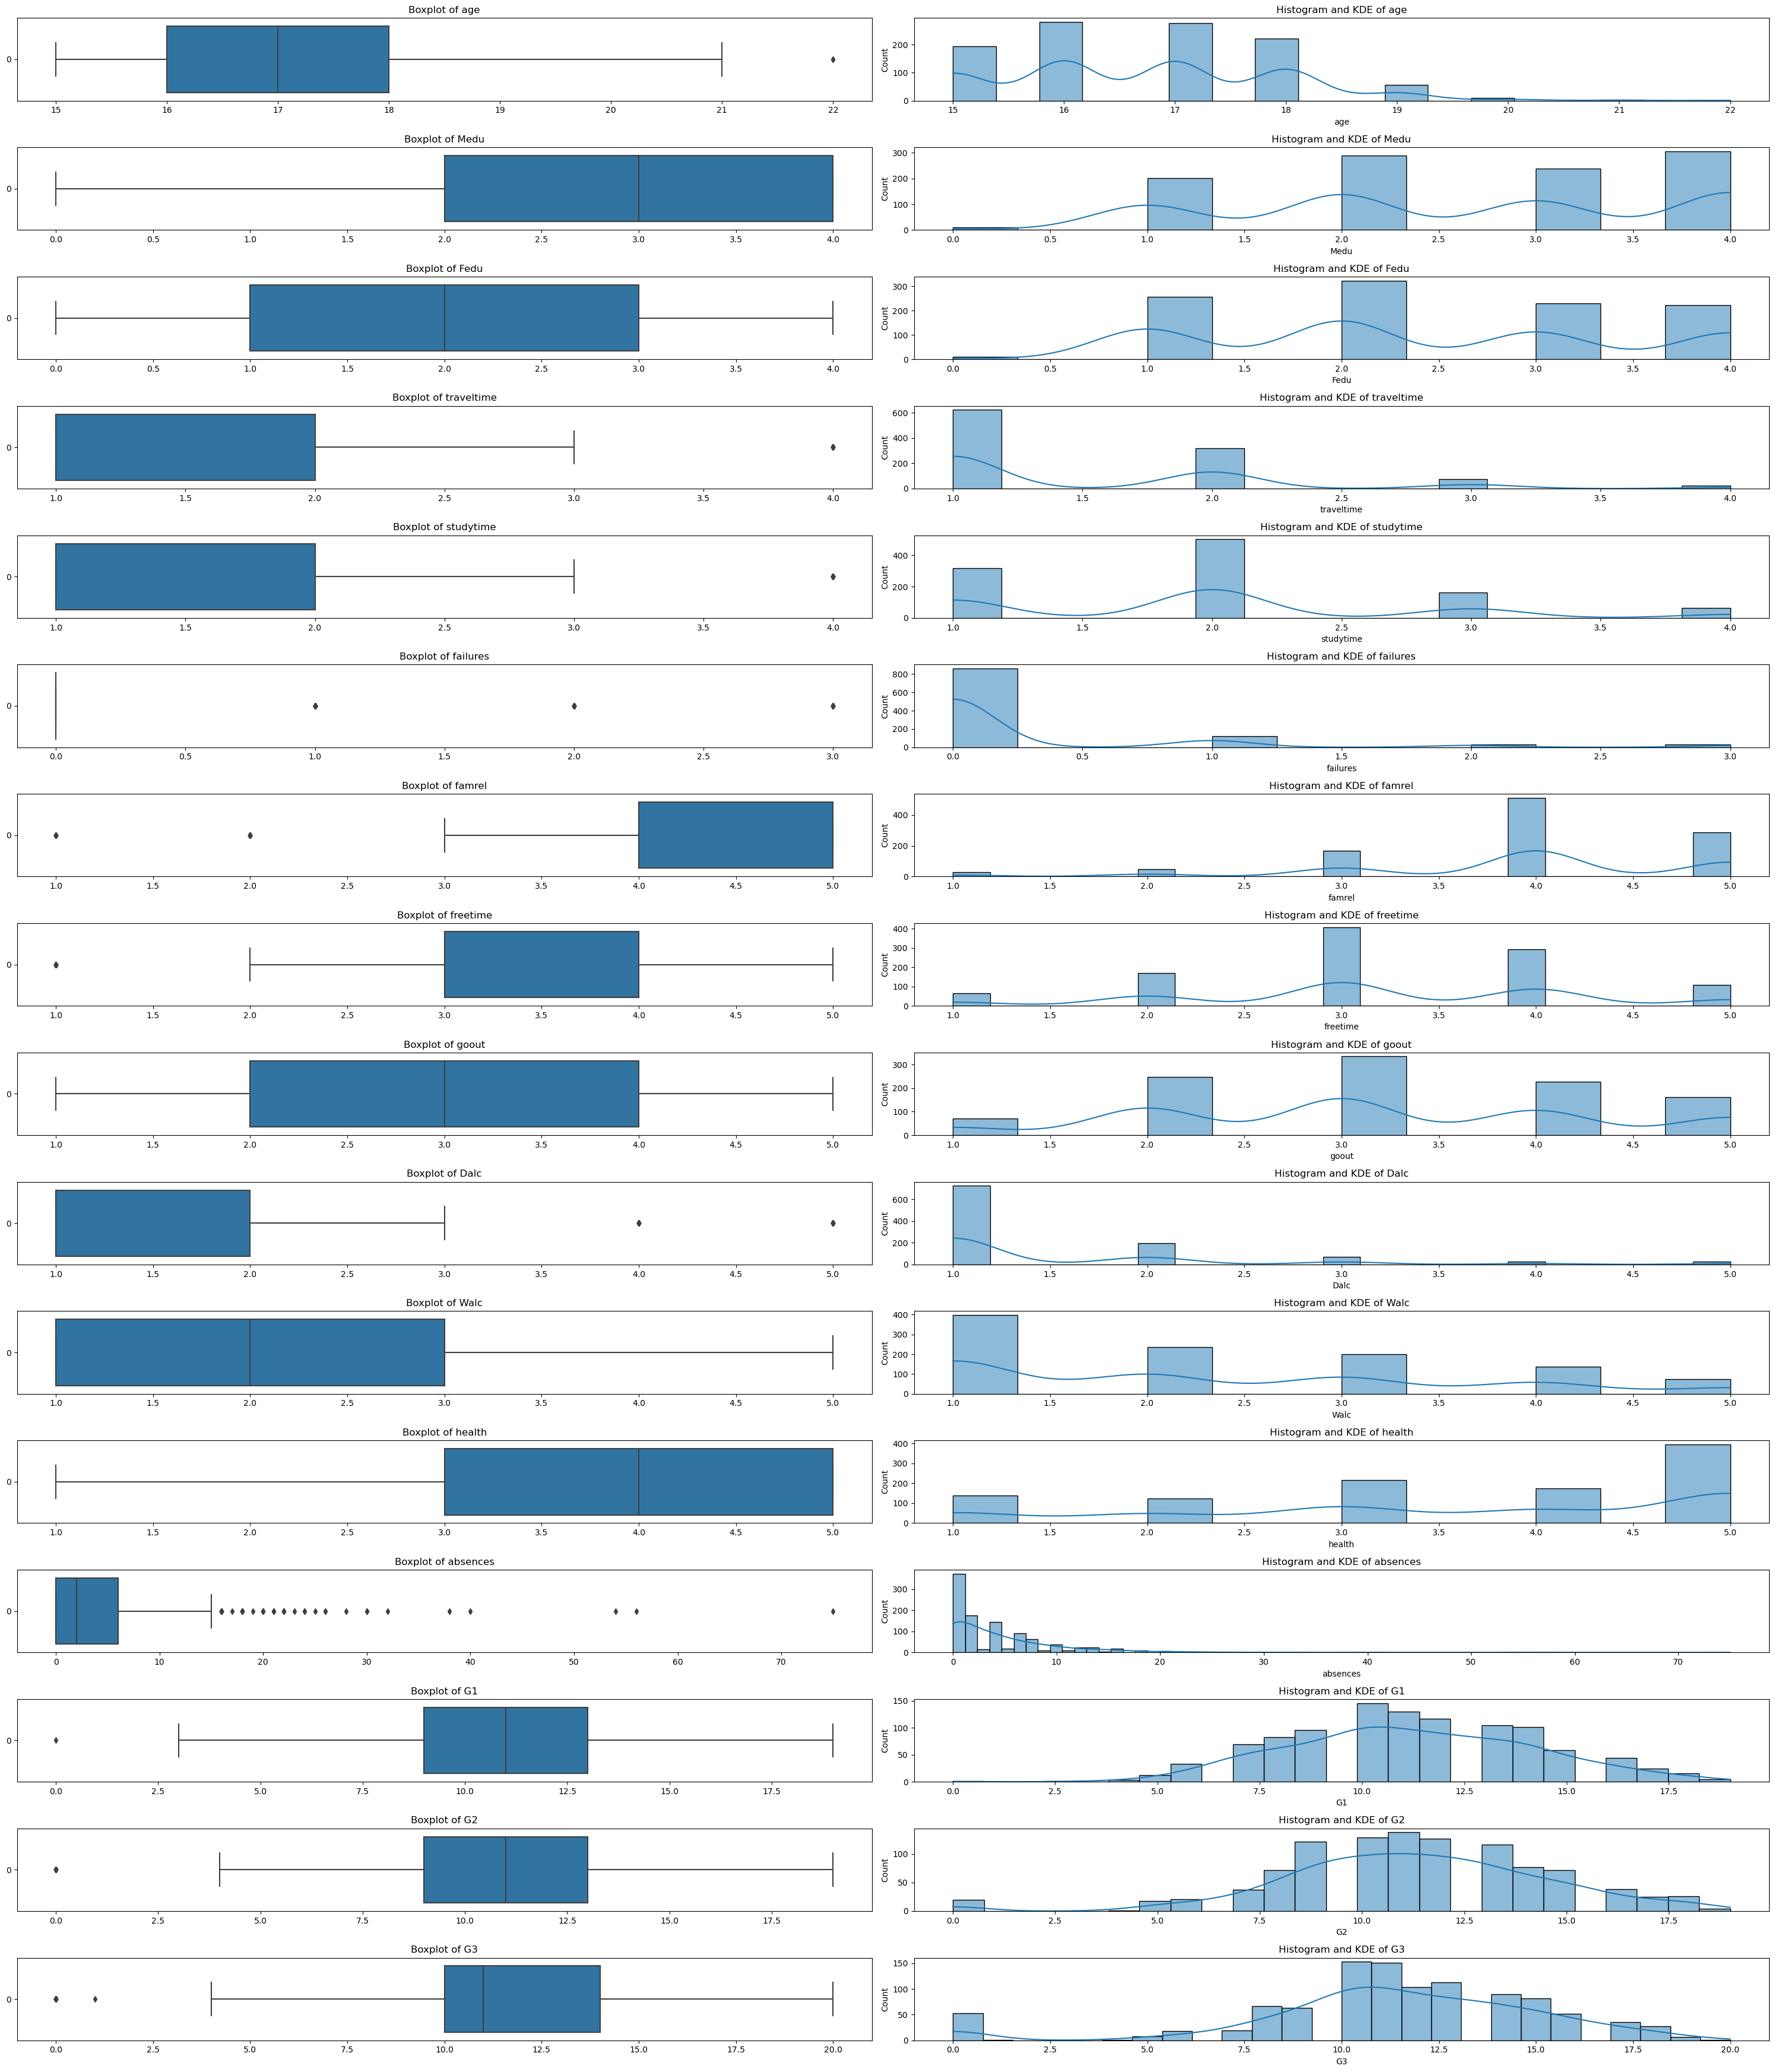

In [9]:
f, axes = plt.subplots(16, 2, figsize=(30, 35))
count = 0
numeric_data = data[num_vals]
for var in numeric_data:
    sns.boxplot(data=numeric_data[var], orient="h", ax=axes[count,0])
    axes[count,0].set_title(f'Boxplot of {var}')
    sns.histplot(data=numeric_data[var], kde=True, ax=axes[count,1])
    axes[count,1].set_title(f'Histogram and KDE of {var}')
    
    count += 1

plt.tight_layout()
plt.show()

Absences is highly skewed with a lot of outliers. Let's remove outliers

In [10]:
q1, q3 = data['absences'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

outliers = data[(data['absences'] < lower_bound) | (data['absences'] > upper_bound)].index
data.drop(index=outliers, inplace=True)

We want to predict the performance of students based on different features. So, we combine the results (G1, G2, G3) into a new feature called 'Total'.

In [11]:
data['Total'] = data['G1'] + data['G2'] + data['G3']
data['Total'].info()

<class 'pandas.core.series.Series'>
Index: 990 entries, 0 to 1043
Series name: Total
Non-Null Count  Dtype
--------------  -----
990 non-null    int64
dtypes: int64(1)
memory usage: 15.5 KB


In [12]:
data['Total'].describe()

count    990.000000
mean      33.950505
std        9.706855
min        4.000000
25%       28.000000
50%       34.000000
75%       40.000000
max       58.000000
Name: Total, dtype: float64

In [13]:
conditions = [
    (data['Total'] <= 24),
    (data['Total'] > 24) & (data['Total'] <= 33),
    (data['Total'] > 33) & (data['Total'] <= 39),
    (data['Total'] > 39) & (data['Total'] <= 45),
    (data['Total'] > 45)
]
values = ['Fail', 'Satisfied', 'Good', 'Very Good', 'Excellent']

data['Grades'] = np.select(conditions, values, default='')

data['Grades'].value_counts()

Grades
Satisfied    338
Good         236
Very Good    161
Fail         139
Excellent    116
Name: count, dtype: int64

We add a categorical data called 'Total'

# EDA

In [14]:
def proportions(column1, column2):
    out = data.groupby(column1)[column2].value_counts(normalize=True).reset_index(name='count')
    return out

#function for EDA
def EDA_data(df, bar_x, bar_y, bar_hue, kde_x, kde_hue, violin_x, violin_y):
    out = proportions(bar_x, bar_hue)
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(13, 8))

    # Bar plot
    total_order = ['Fail', 'Satisfied', 'Good', 'Very Good', 'Excellent']
    sns.barplot(x=out[bar_x], y=out[bar_y], hue=out[bar_hue], ax=axs[0,0], hue_order=total_order)
    axs[0,0].set_xlabel(bar_x.capitalize())
    axs[0,0].set_ylabel('Count')
    axs[0,0].set_title(f'Normalized Count of {bar_y} by {bar_x.capitalize()}')
    axs[0,0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # KDE plot
    sns.kdeplot(x=df[kde_x], hue=df[kde_hue], ax=axs[0,1])
    axs[0,1].set_xlabel(kde_x.capitalize())
    axs[0,1].set_ylabel('Density')
    axs[0,1].set_title(f'Distribution of {kde_x} due to {kde_hue.capitalize()}')

    # Violin plot
    sns.violinplot(x=df[violin_x], y=df[violin_y], inner="quartile", ax=axs[1,0])
    axs[1,0].set_xlabel(violin_x.capitalize())
    axs[1,0].set_ylabel(violin_y.capitalize())
    axs[1,0].set_title('Violin Plot')

    fig.delaxes(axs[1,1])
    plt.tight_layout()
    plt.show()

## EDA for categorical data

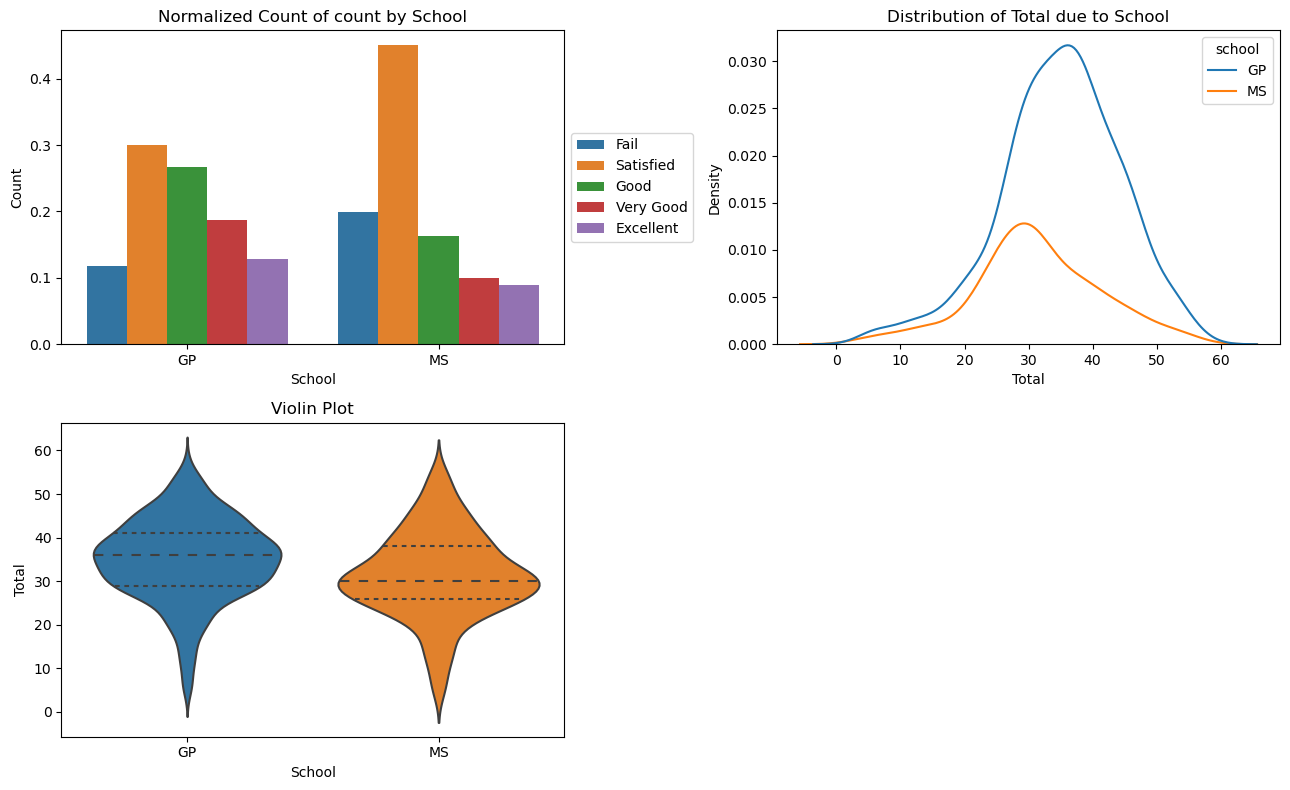

In [15]:
#EDA for school
EDA_data(data, 'school', 'count', 'Grades', 'Total', 'school', 'school', 'Total')

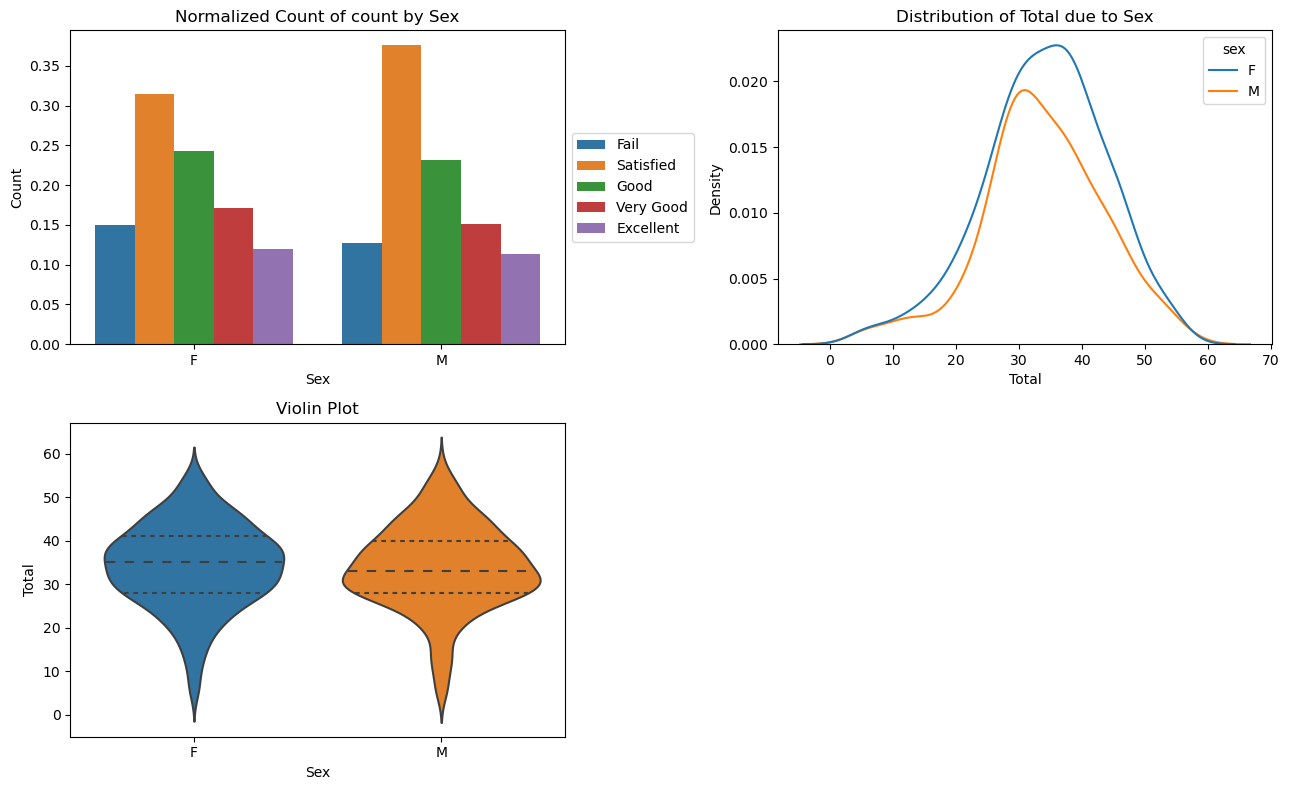

In [16]:
#EDA for sex
EDA_data(data, 'sex', 'count', 'Grades', 'Total', 'sex', 'sex', 'Total')

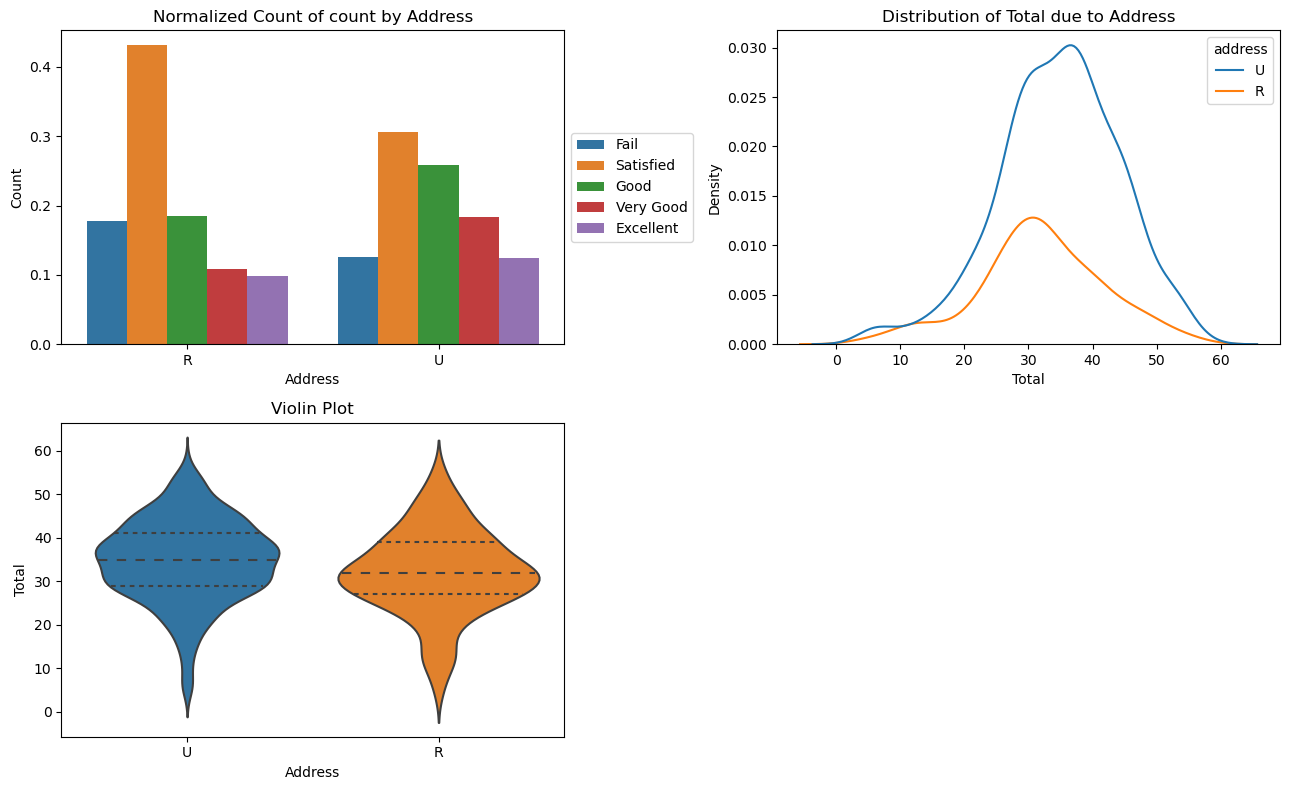

In [17]:
#EDA for address
EDA_data(data, 'address', 'count', 'Grades', 'Total', 'address', 'address', 'Total')

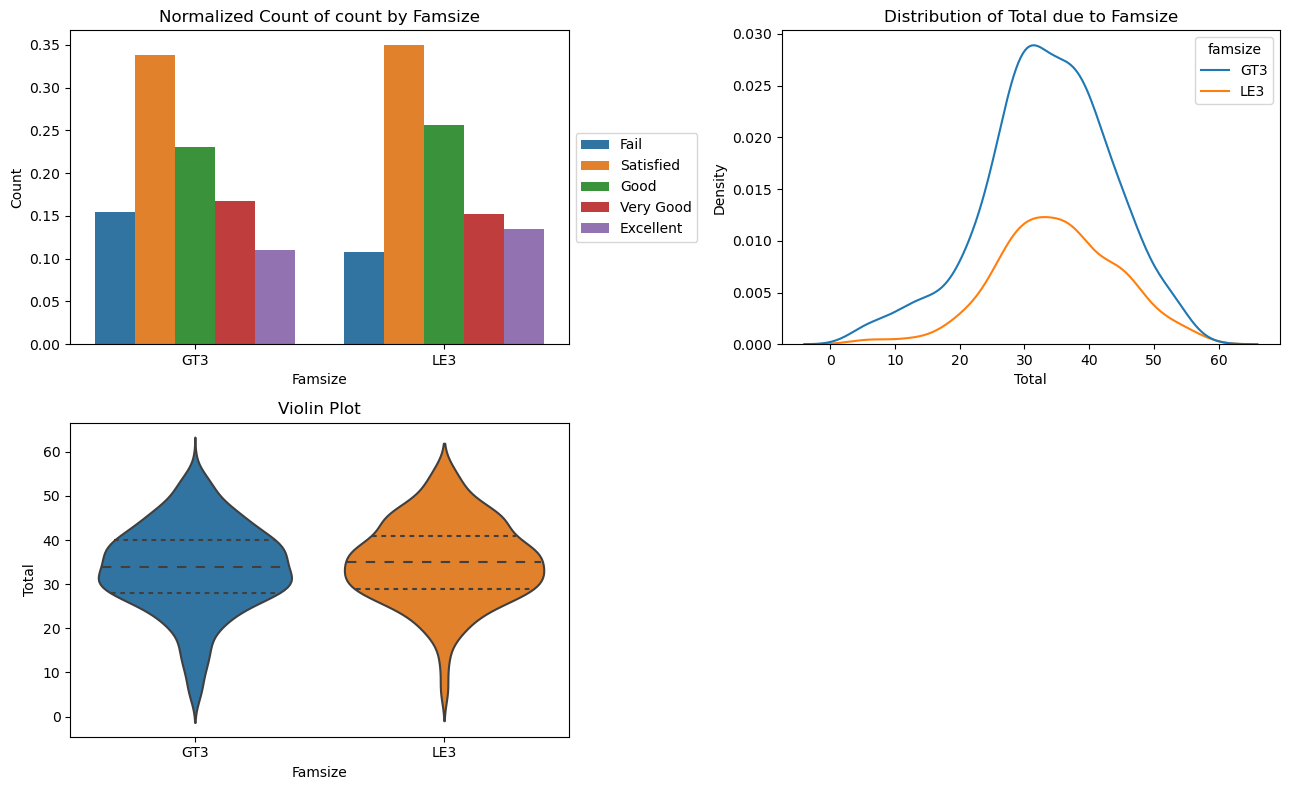

In [18]:
#EDA for famsize
EDA_data(data, 'famsize', 'count', 'Grades', 'Total', 'famsize', 'famsize', 'Total')

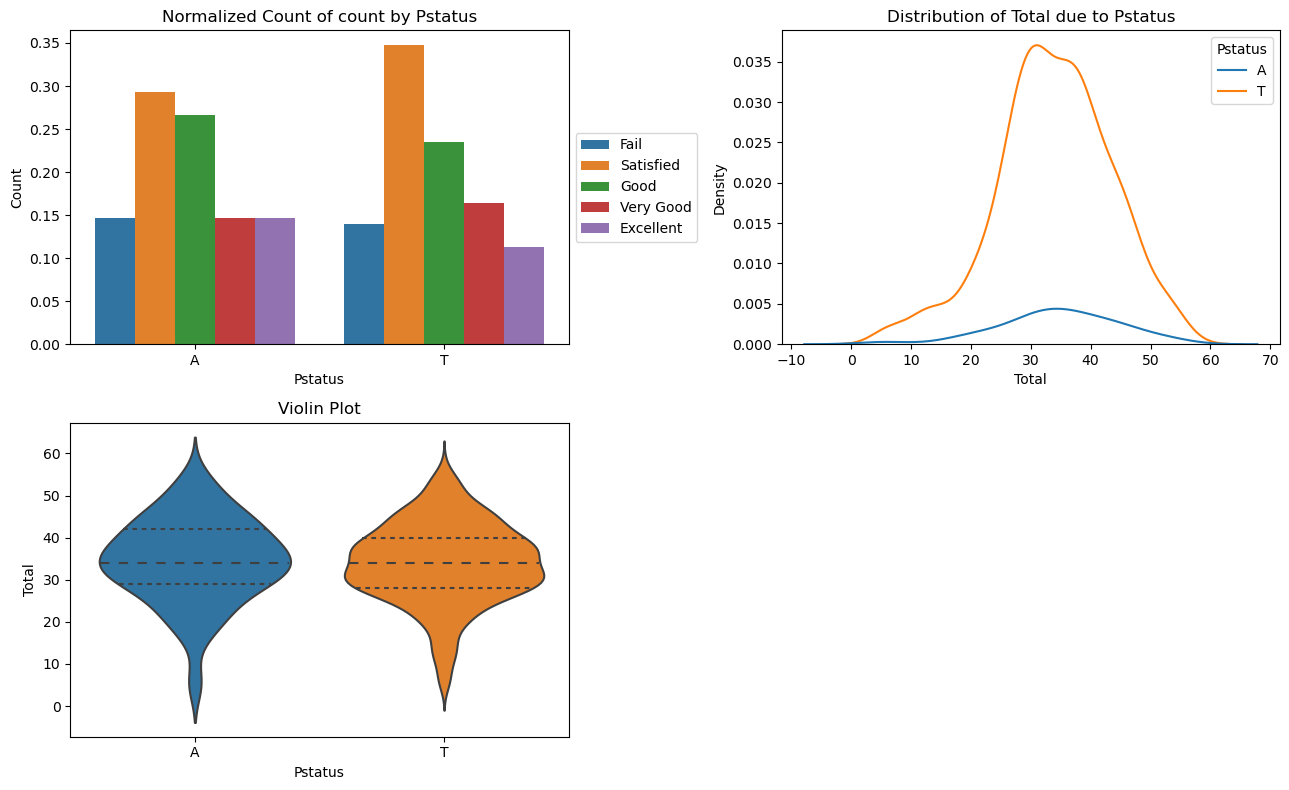

In [19]:
#EDA for Pstatus
EDA_data(data, 'Pstatus', 'count', 'Grades', 'Total', 'Pstatus', 'Pstatus', 'Total')

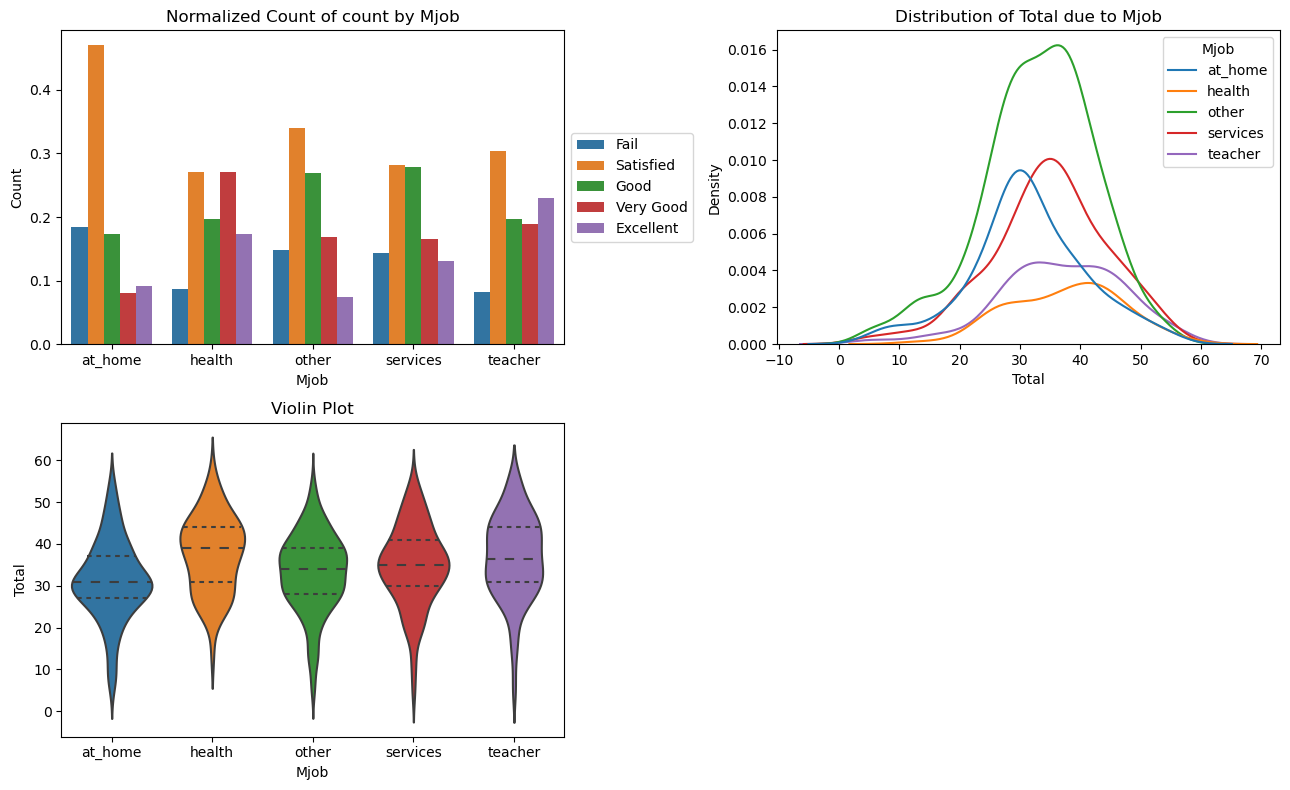

In [20]:
#EDA for Mjob
EDA_data(data, 'Mjob', 'count', 'Grades', 'Total', 'Mjob', 'Mjob', 'Total')

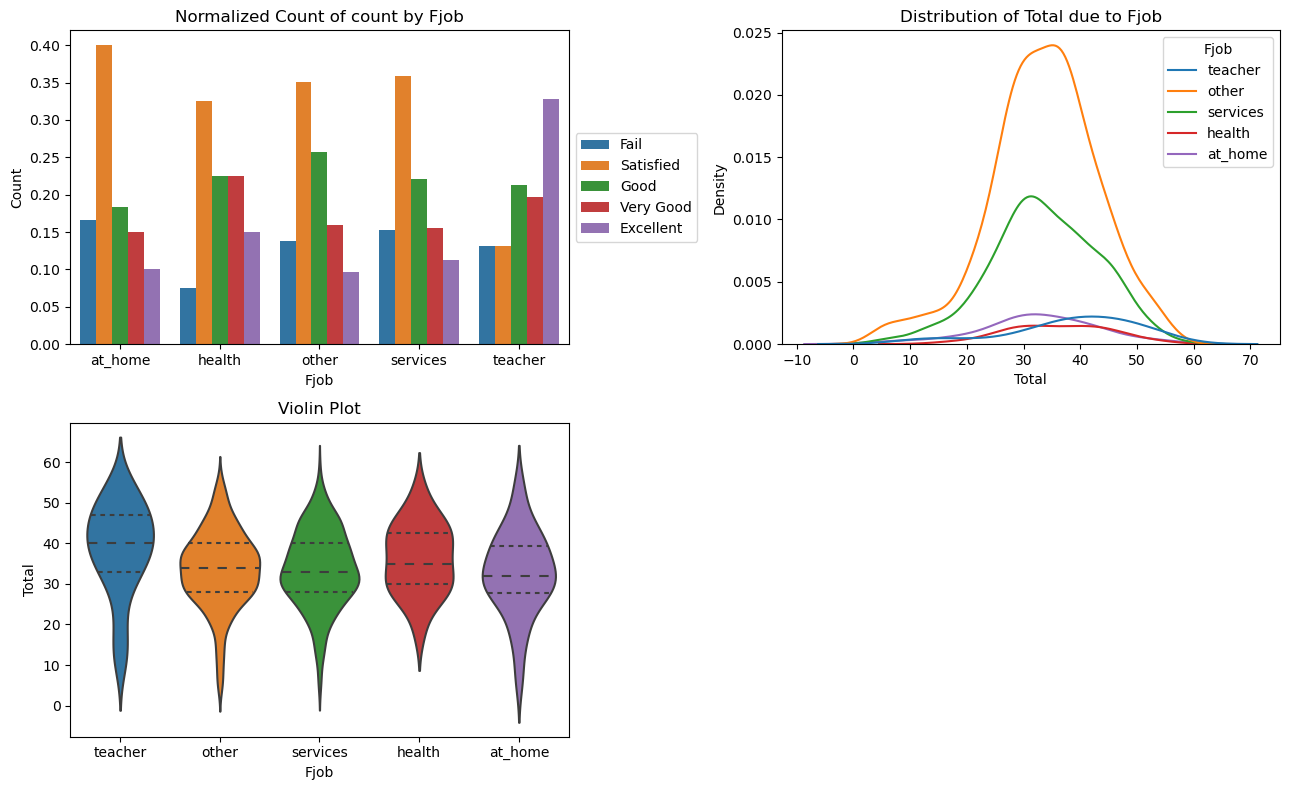

In [21]:
#EDA for Fjob
EDA_data(data, 'Fjob', 'count', 'Grades', 'Total', 'Fjob', 'Fjob', 'Total')

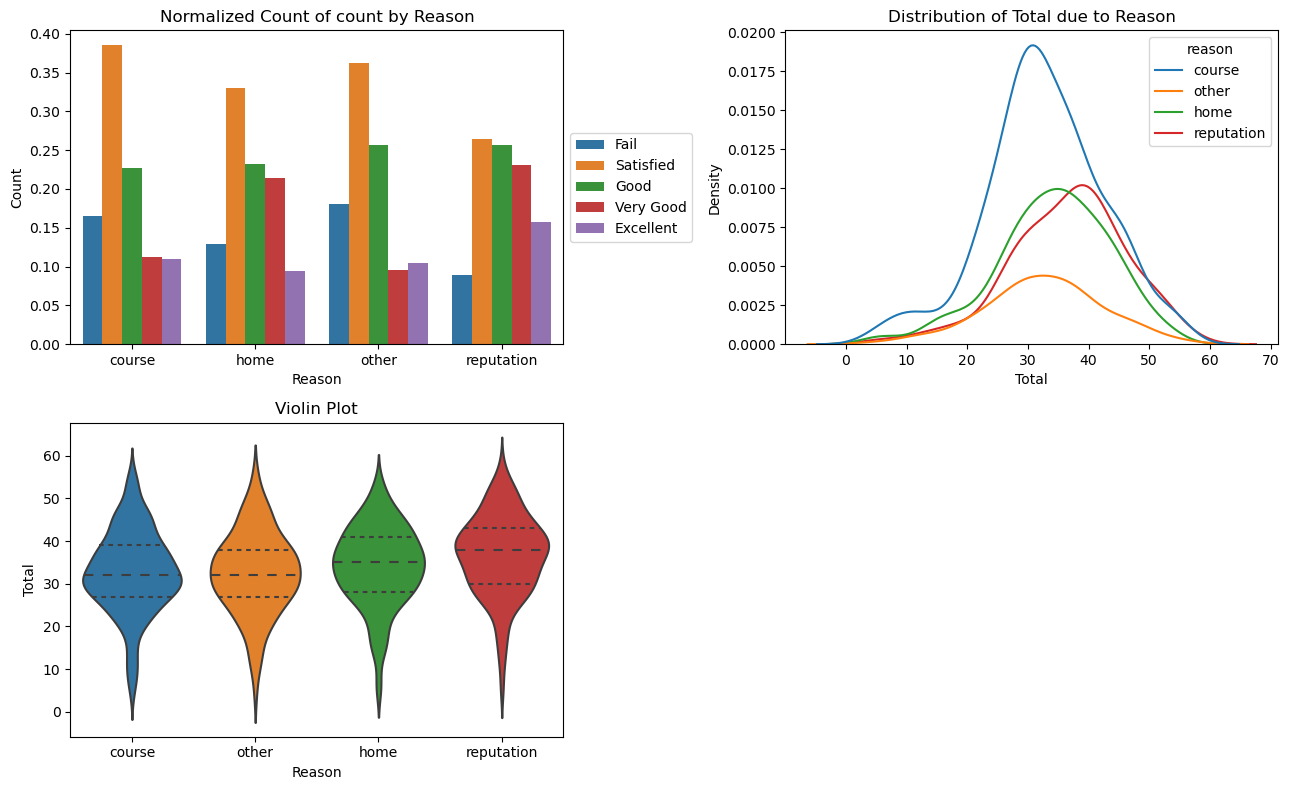

In [22]:
#EDA for reason
EDA_data(data, 'reason', 'count', 'Grades', 'Total', 'reason', 'reason', 'Total')

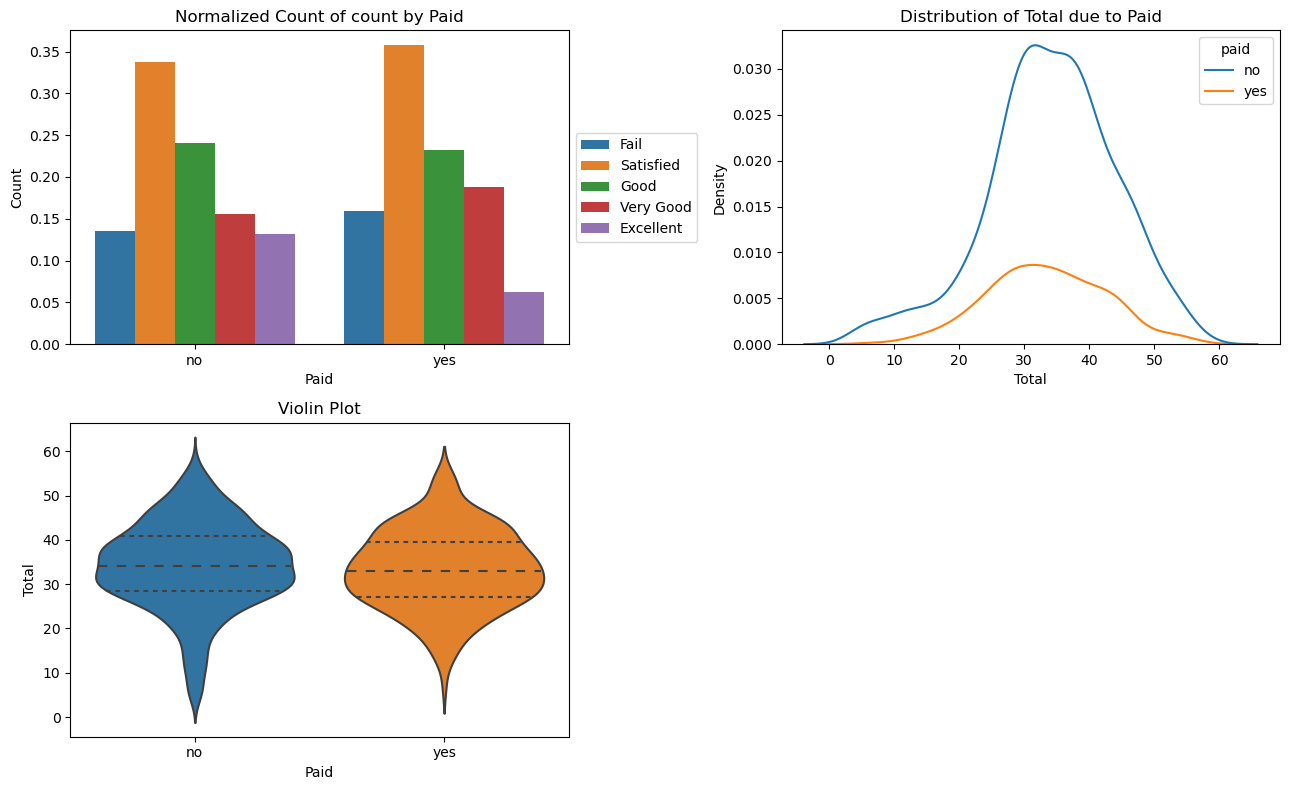

In [23]:
#EDA for paid
EDA_data(data, 'paid', 'count', 'Grades', 'Total', 'paid', 'paid', 'Total')

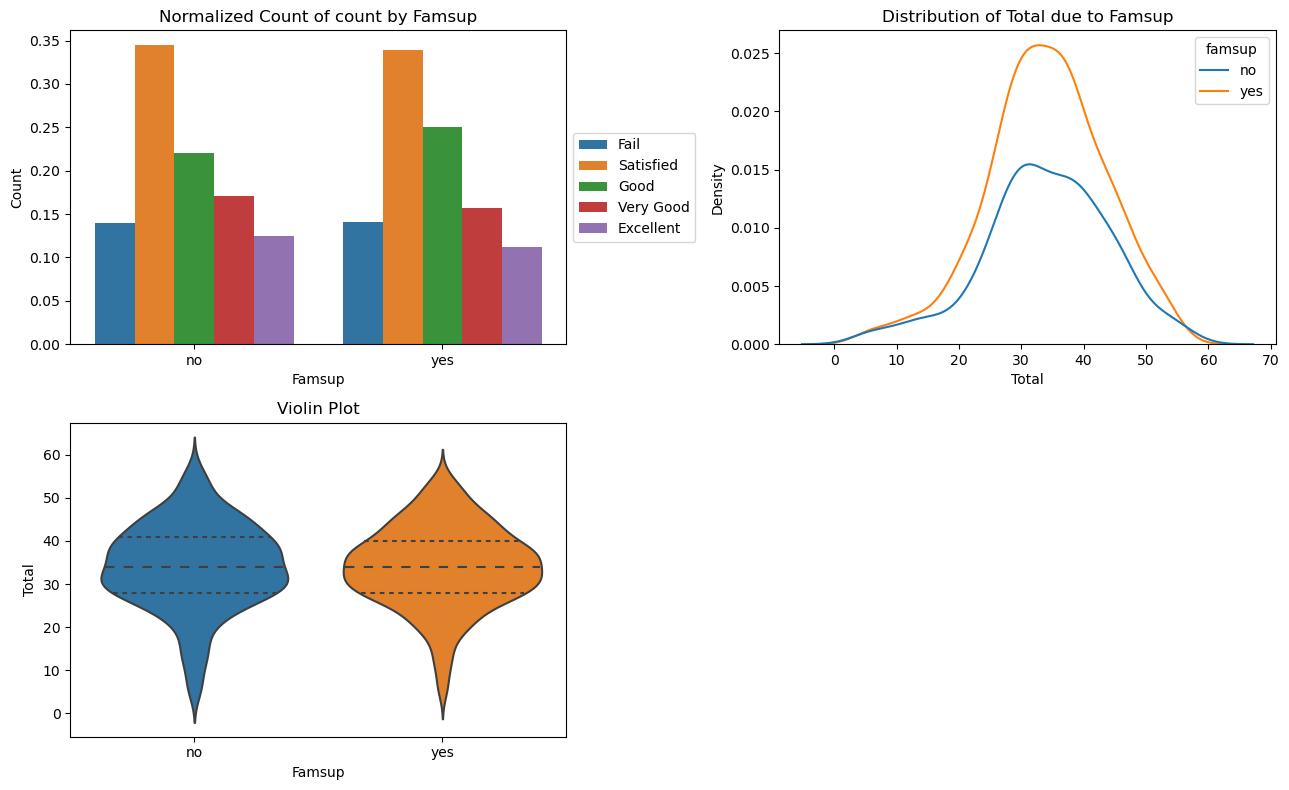

In [24]:
#EDA for famsup
EDA_data(data, 'famsup', 'count', 'Grades', 'Total', 'famsup', 'famsup', 'Total')

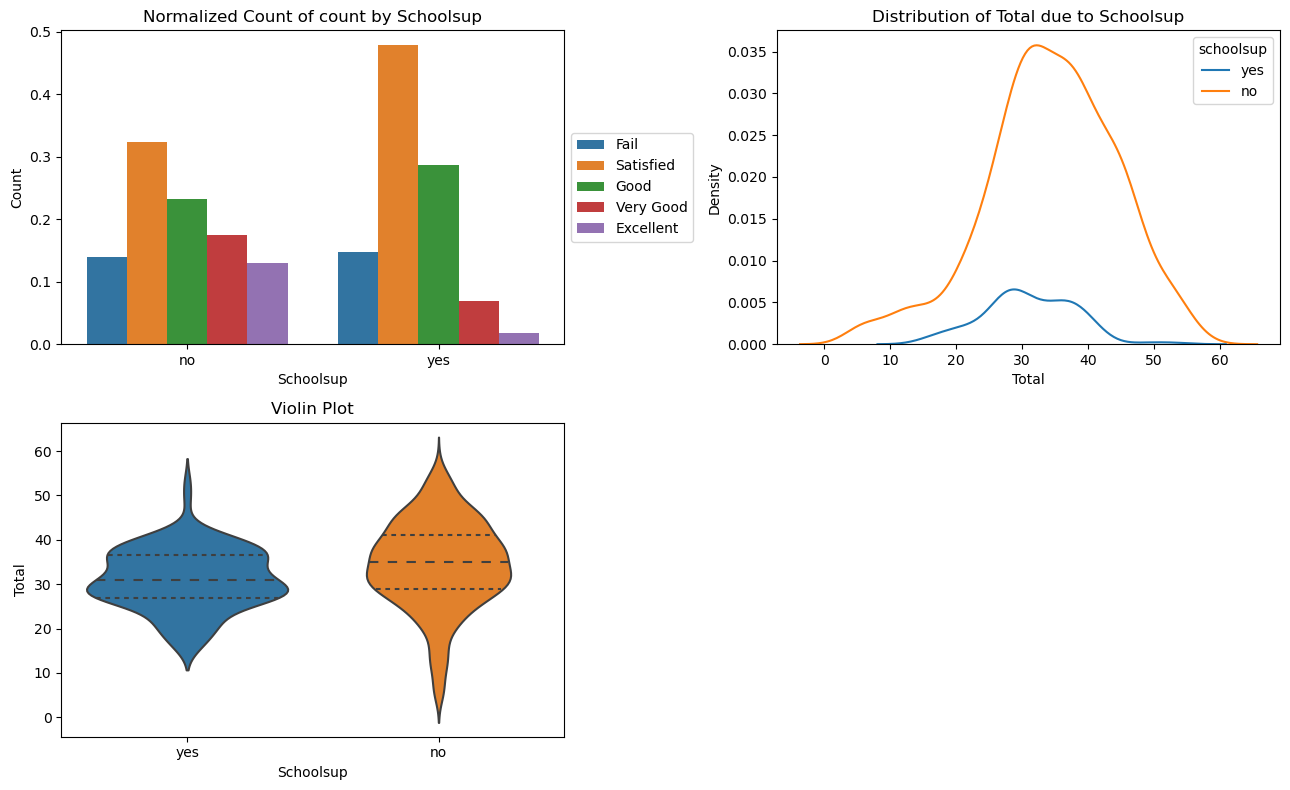

In [25]:
#EDA for schoolsup
EDA_data(data, 'schoolsup', 'count', 'Grades', 'Total', 'schoolsup', 'schoolsup', 'Total')

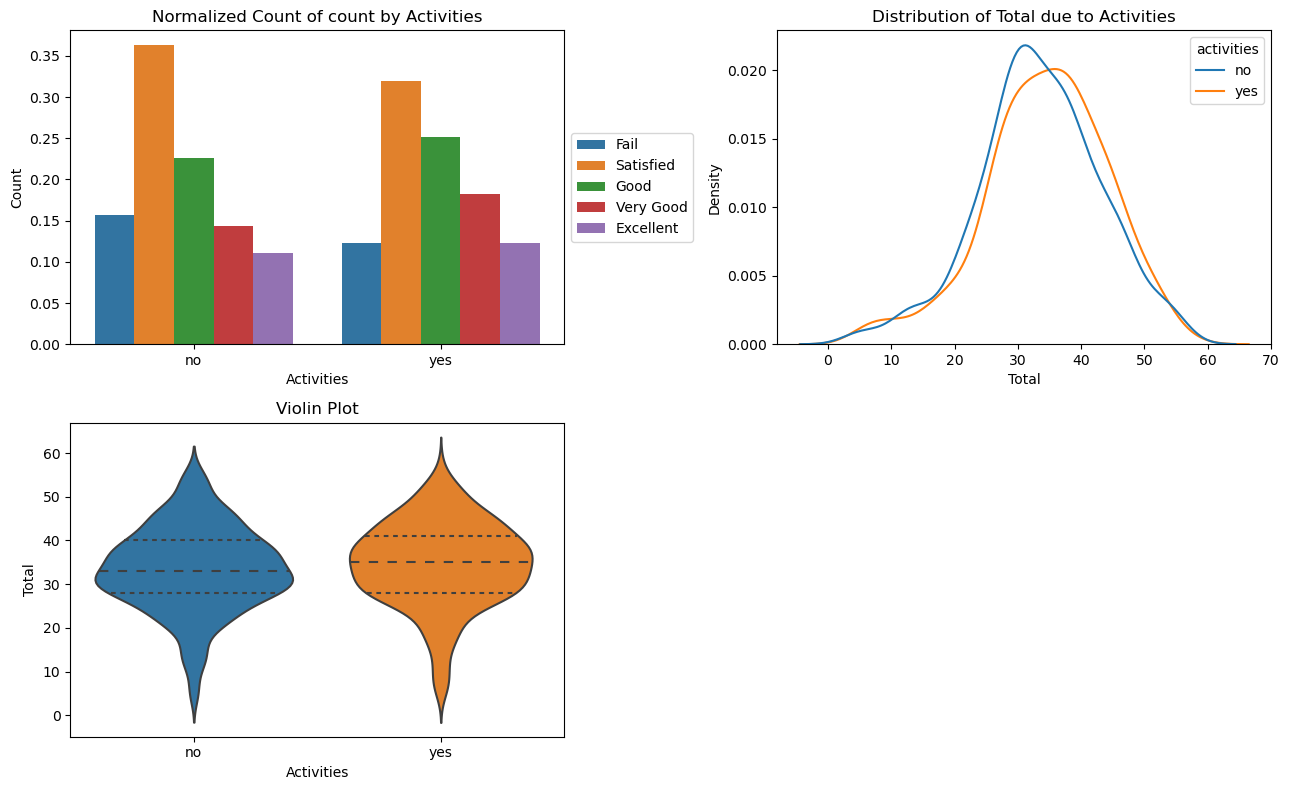

In [26]:
#EDA for activities
EDA_data(data, 'activities', 'count', 'Grades', 'Total', 'activities', 'activities', 'Total')

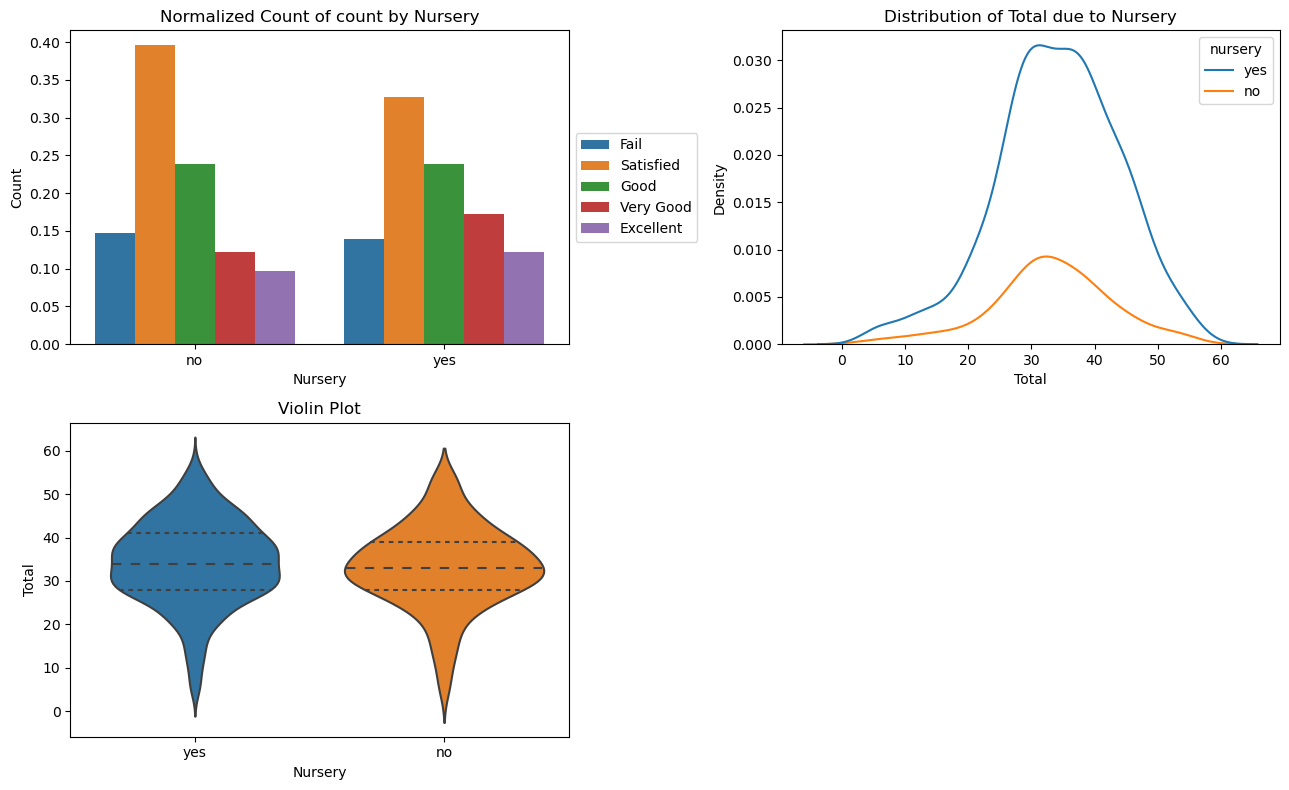

In [27]:
#EDA for nursery
EDA_data(data, 'nursery', 'count', 'Grades', 'Total', 'nursery', 'nursery', 'Total')

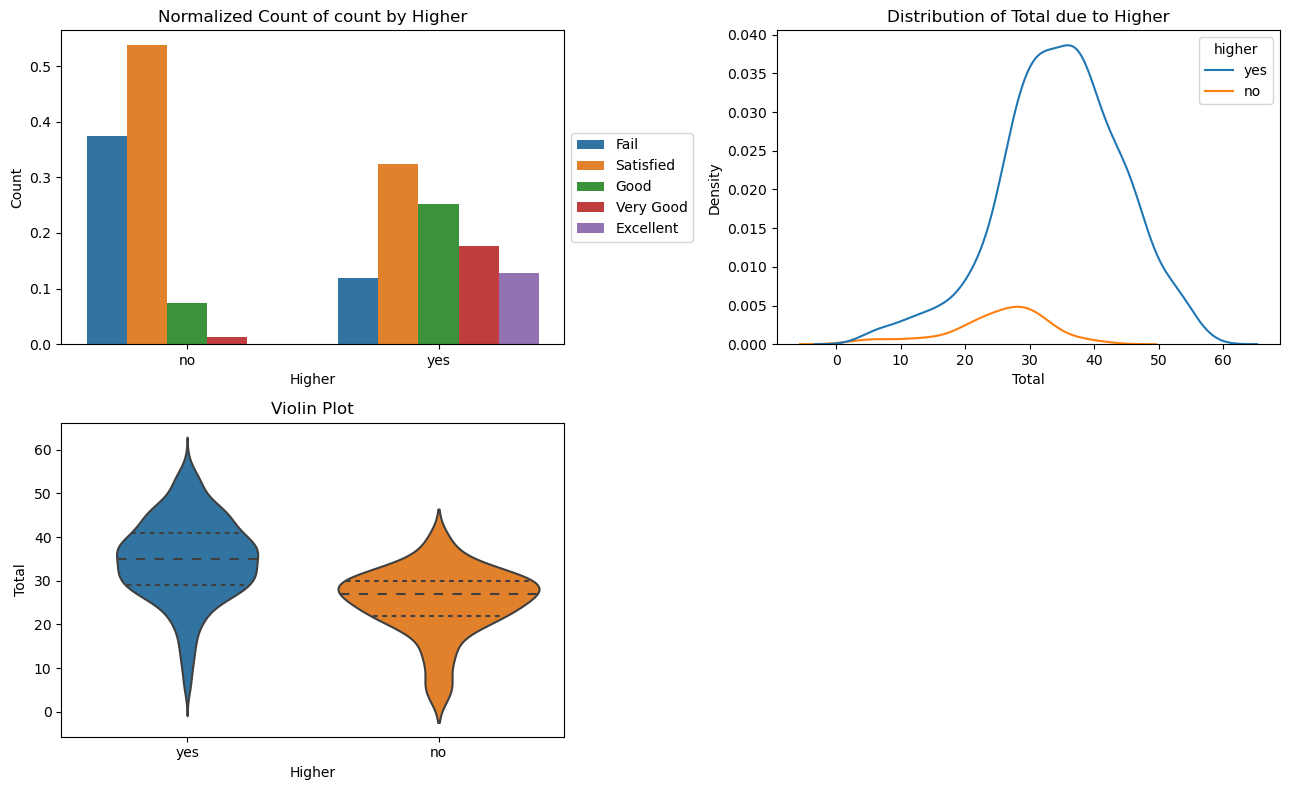

In [28]:
#EDA for higher
EDA_data(data, 'higher', 'count', 'Grades', 'Total', 'higher', 'higher', 'Total')

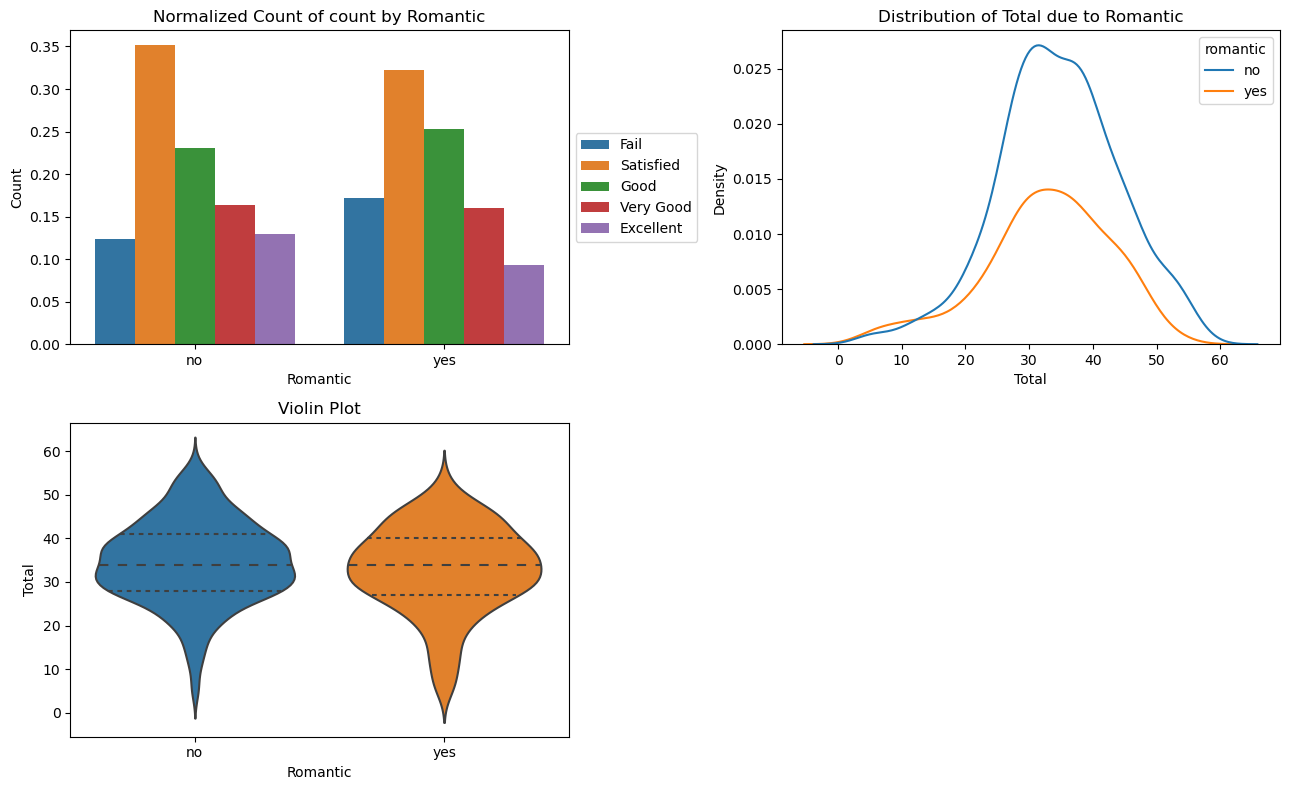

In [29]:
#EDA for romantic
EDA_data(data, 'romantic', 'count', 'Grades', 'Total', 'romantic', 'romantic', 'Total')

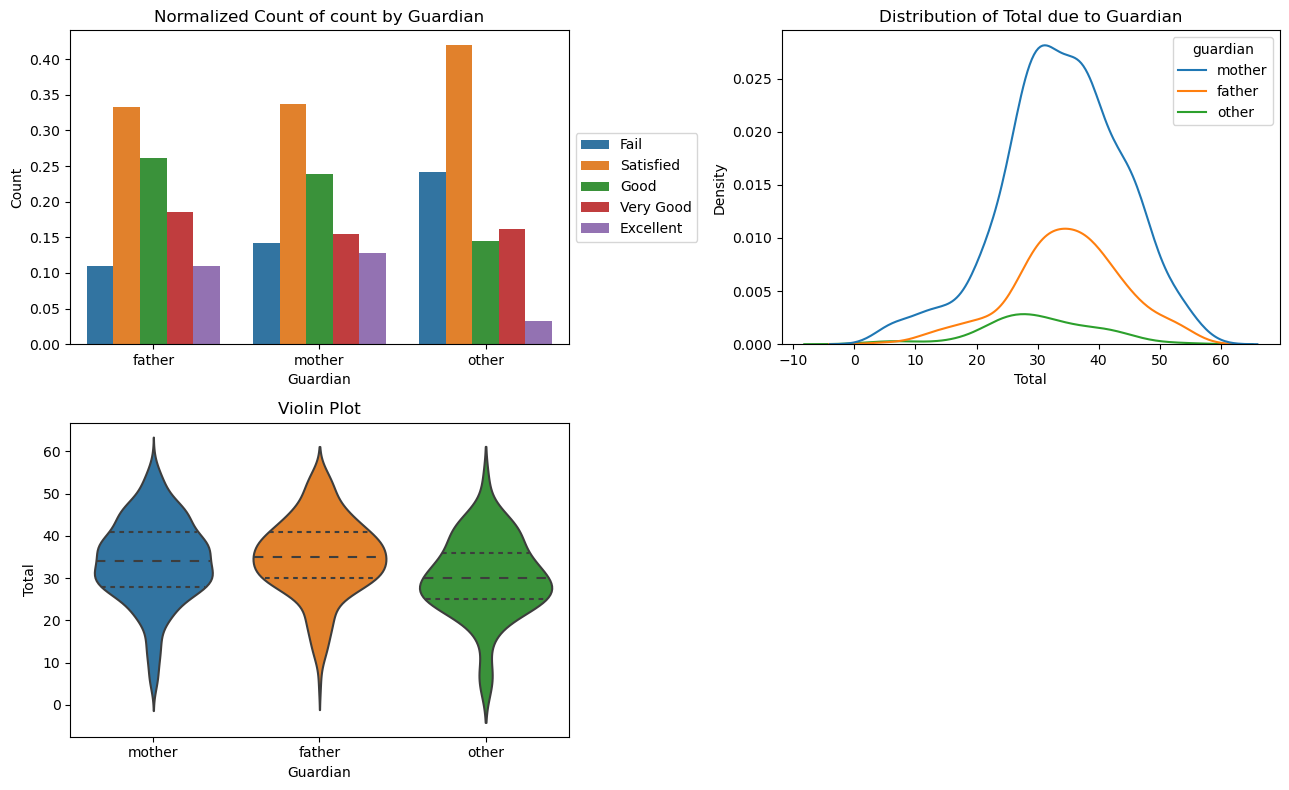

In [30]:
#EDA for guardian
EDA_data(data, 'guardian', 'count', 'Grades', 'Total', 'guardian', 'guardian', 'Total')

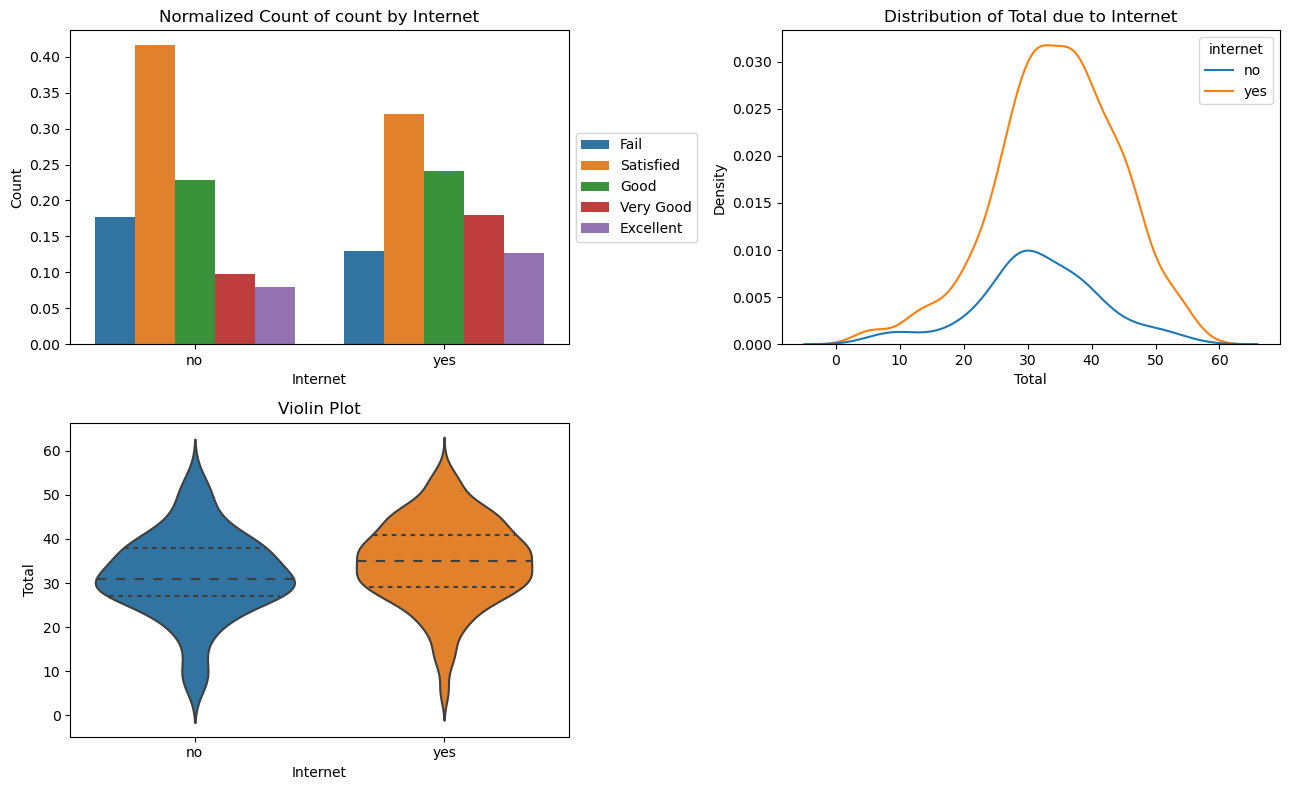

In [31]:
#EDA for internet
EDA_data(data, 'internet', 'count', 'Grades', 'Total', 'internet', 'internet', 'Total')

## EDA for numerical data

In [32]:
#EDA for Medu
data['Medu'].value_counts()

Medu
4    292
2    275
3    217
1    197
0      9
Name: count, dtype: int64

Because the data for 0 is just 9, so we combine this into 1

In [33]:
data['Medu'] = data['Medu'].map({0: 1, 1: 1, 2: 2, 3: 3, 4: 4})
data['Medu'].value_counts()

Medu
4    292
2    275
3    217
1    206
Name: count, dtype: int64

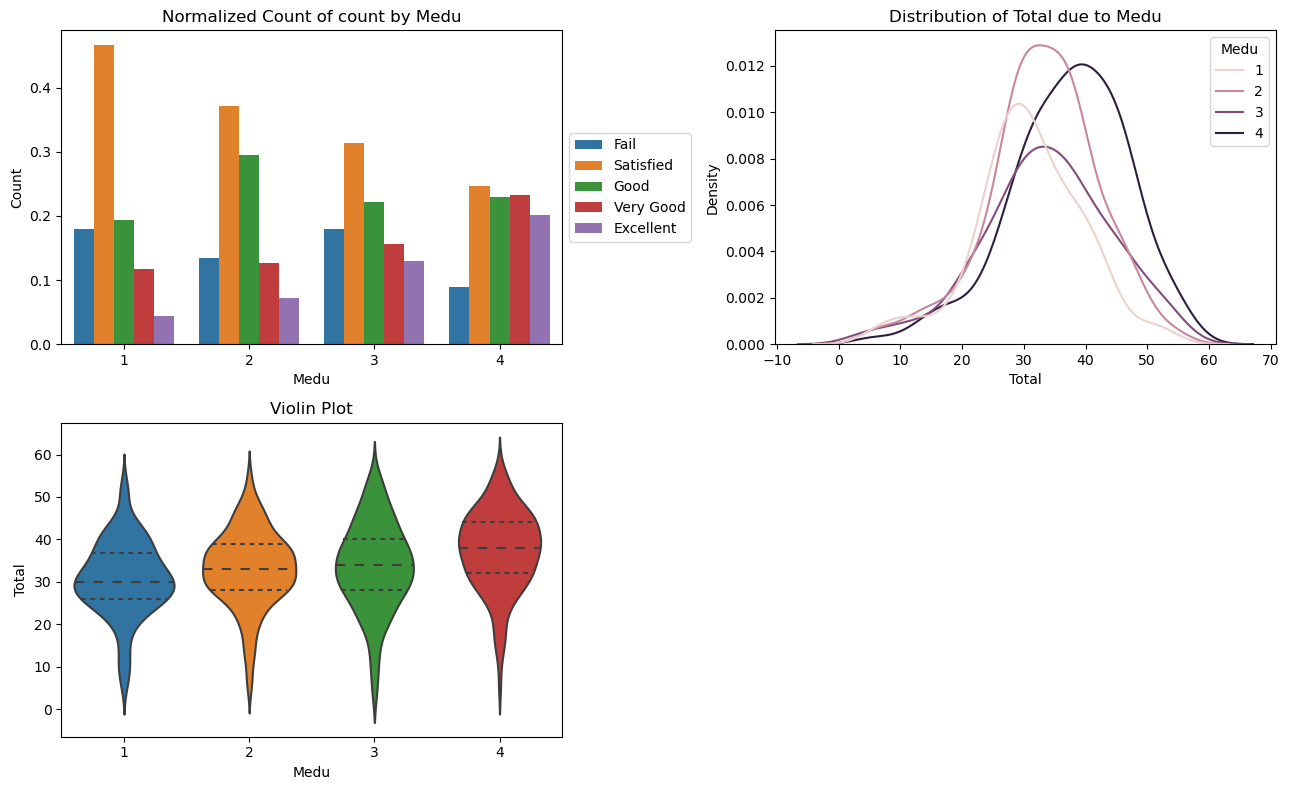

In [34]:
EDA_data(data, 'Medu', 'count', 'Grades', 'Total', 'Medu', 'Medu', 'Total')

In [35]:
#EDA for Fedu
data['Fedu'].value_counts()

Fedu
2    307
1    245
3    217
4    212
0      9
Name: count, dtype: int64

In [36]:
data['Fedu'] = data['Fedu'].map({0: 1, 1: 1, 2: 2, 3: 3, 4: 4})
data['Fedu'].value_counts()

Fedu
2    307
1    254
3    217
4    212
Name: count, dtype: int64

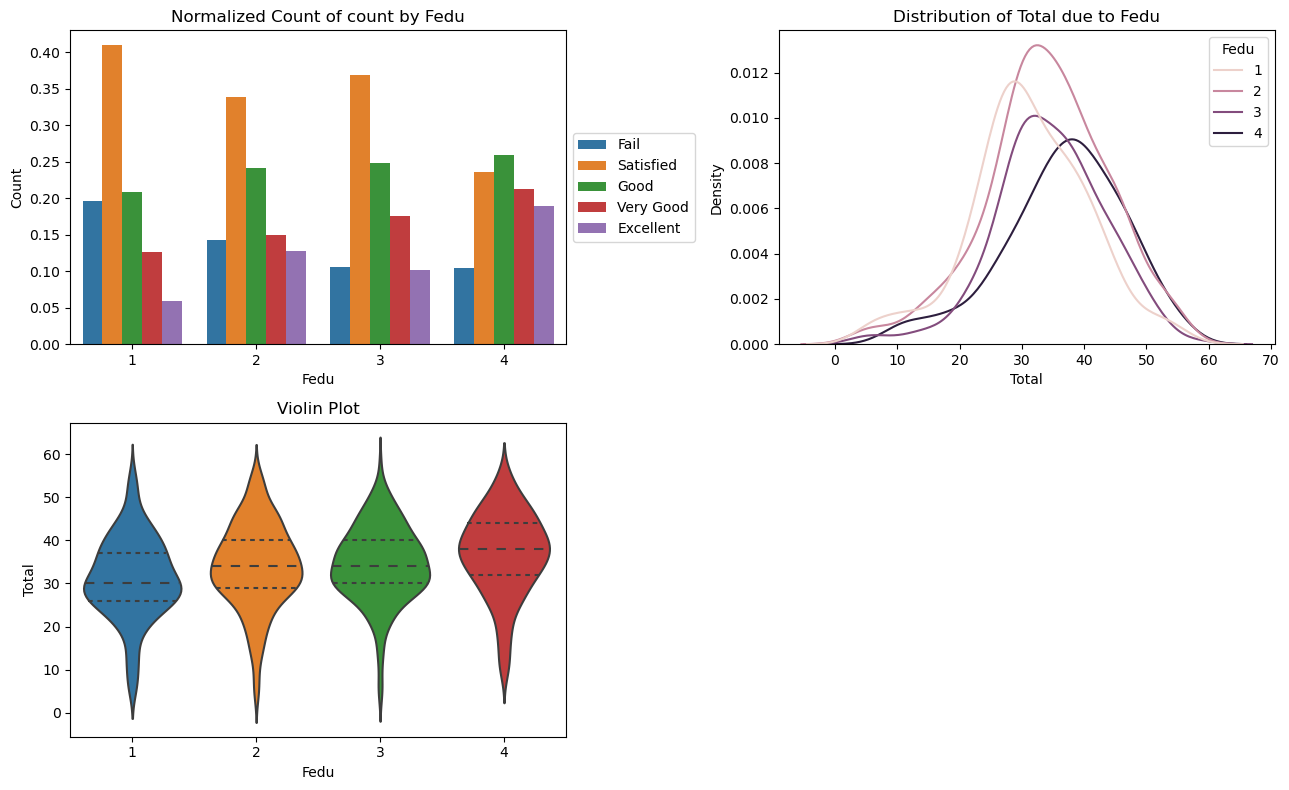

In [37]:
EDA_data(data, 'Fedu', 'count', 'Grades', 'Total', 'Fedu', 'Fedu', 'Total')

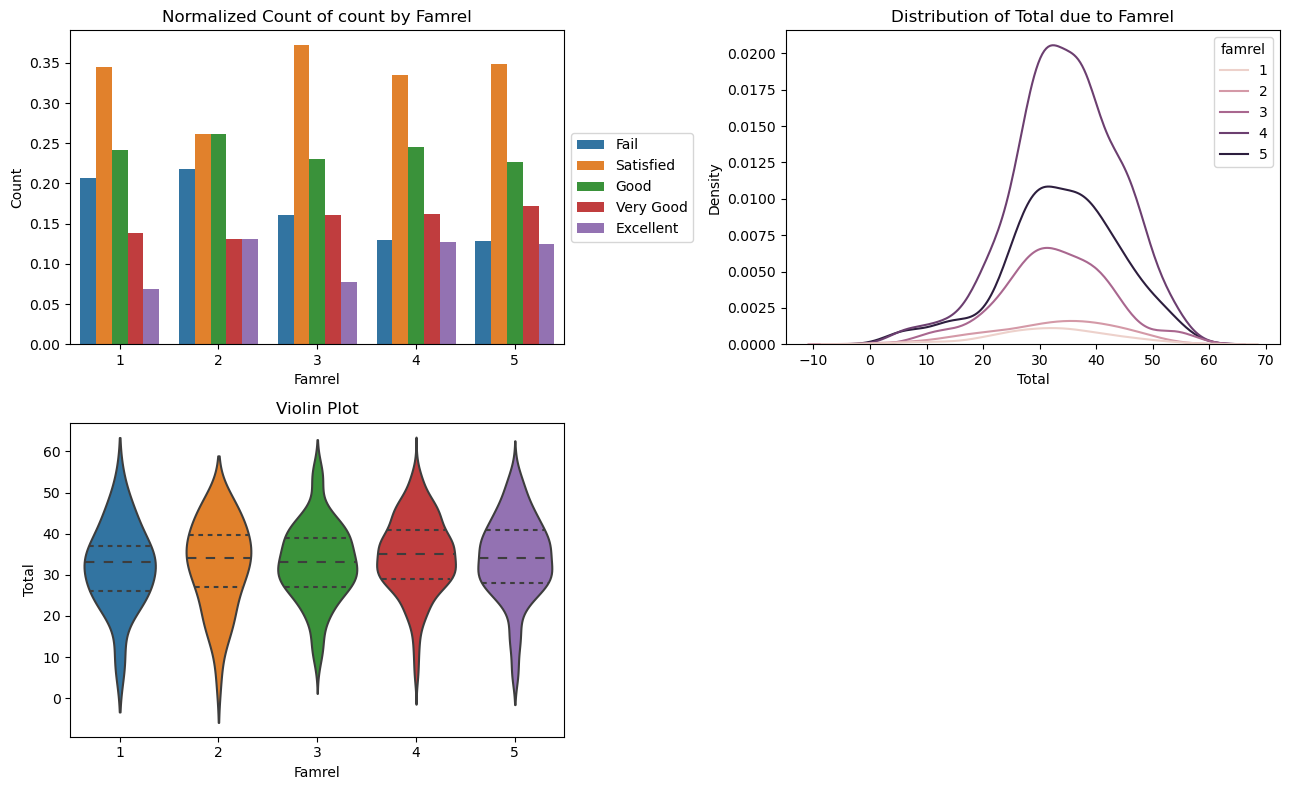

In [38]:
#EDA for famrel
EDA_data(data, 'famrel', 'count', 'Grades', 'Total', 'famrel', 'famrel', 'Total')

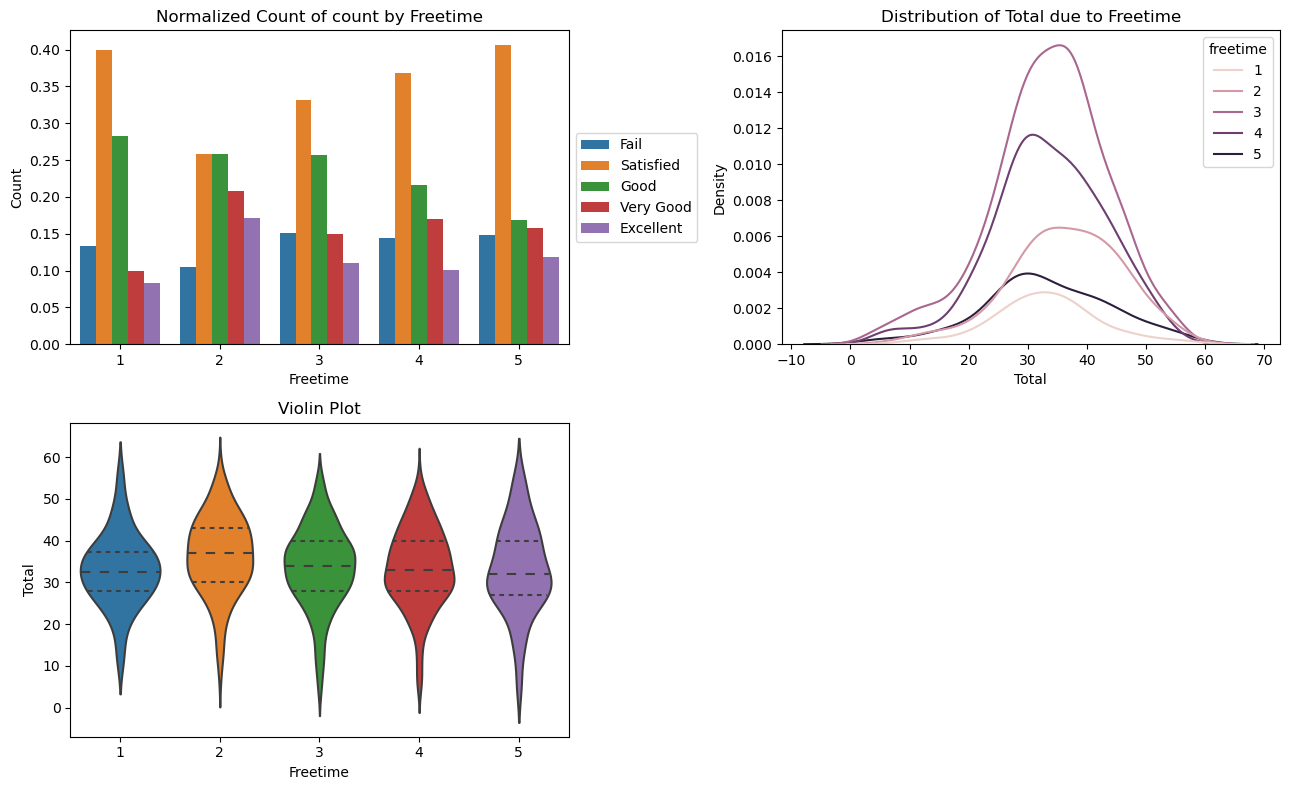

In [39]:
#EDA for freetime
EDA_data(data, 'freetime', 'count', 'Grades', 'Total', 'freetime', 'freetime', 'Total')

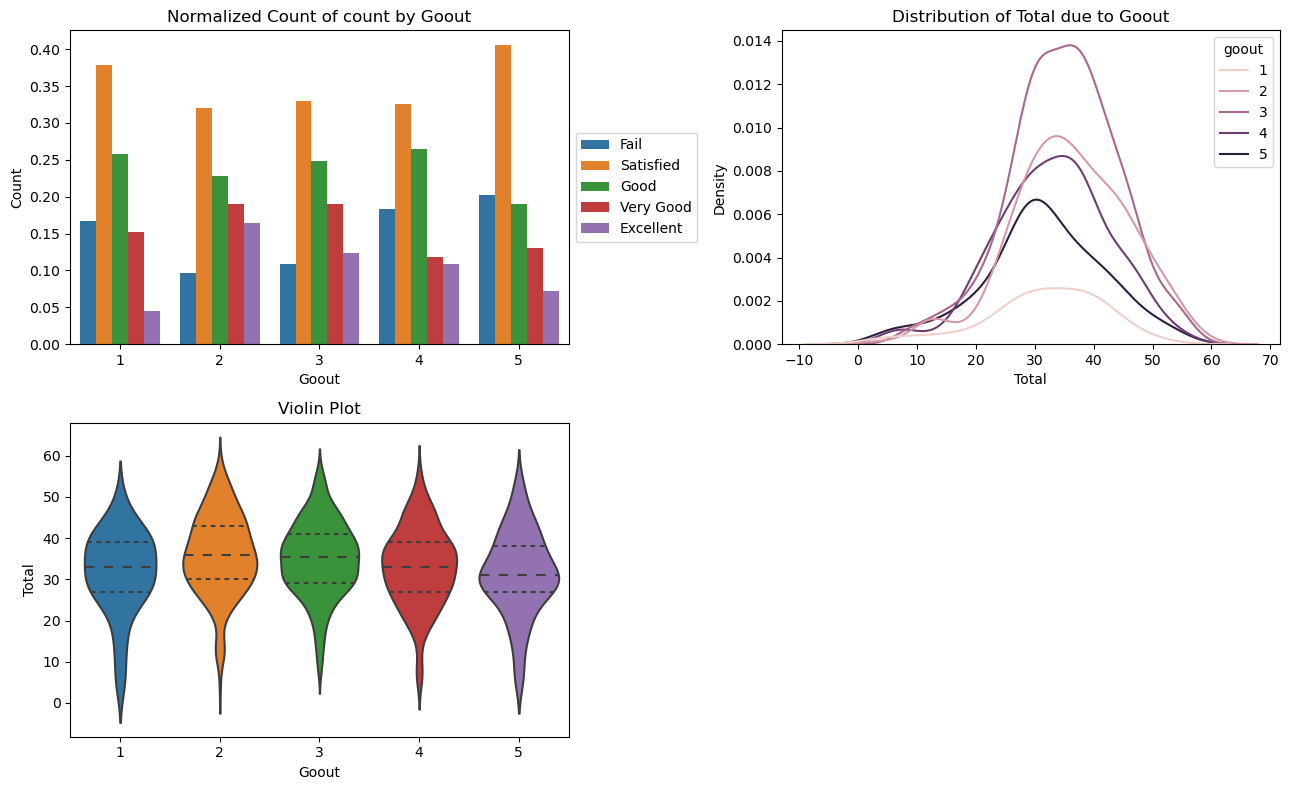

In [40]:
#EDA for goout
EDA_data(data, 'goout', 'count', 'Grades', 'Total', 'goout', 'goout', 'Total')

In [41]:
#EDA for Dalc
data['Dalc'].value_counts()

Dalc
1    699
2    182
3     61
4     25
5     23
Name: count, dtype: int64

In [42]:
data['Dalc'] = data['Dalc'].map({1: 1, 2: 2, 3: 3, 4: 3, 5: 3})

In [43]:
data['Dalc'].value_counts()

Dalc
1    699
2    182
3    109
Name: count, dtype: int64

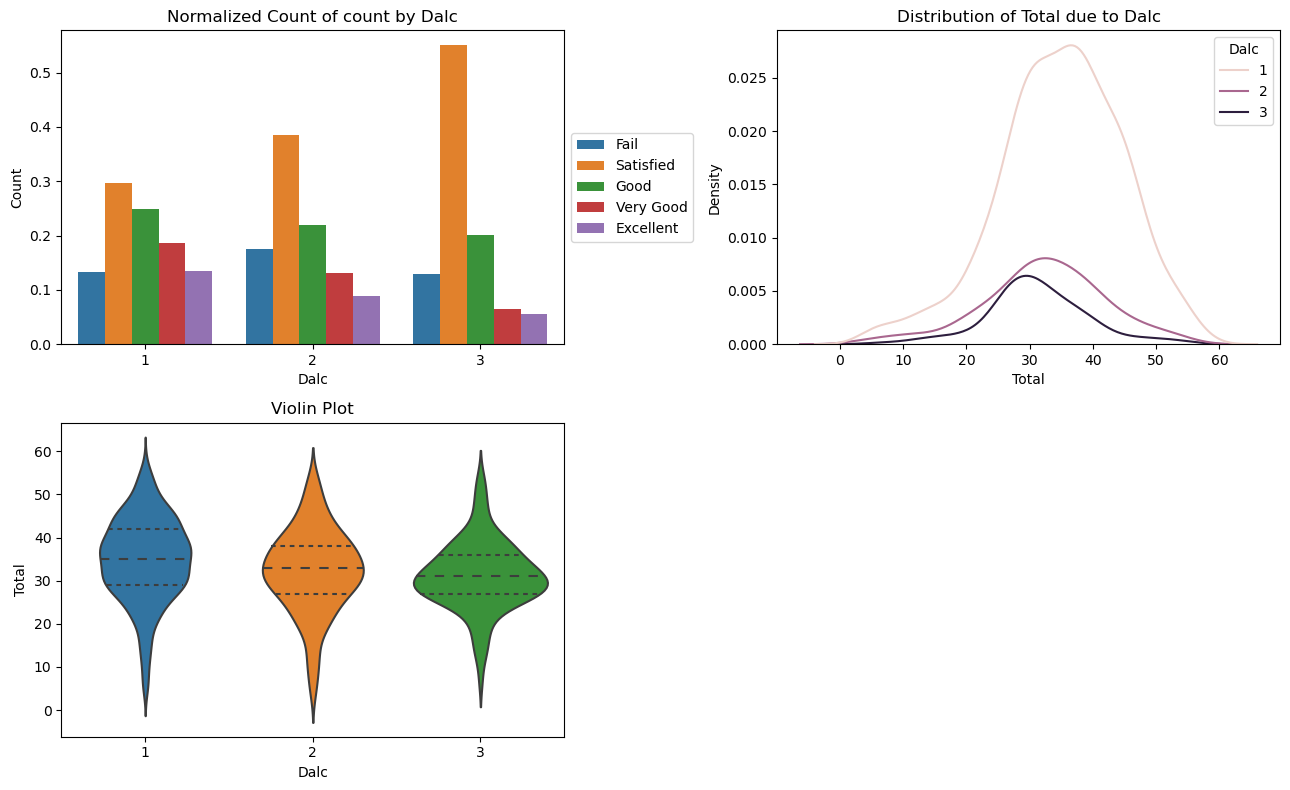

In [44]:
EDA_data(data, 'Dalc', 'count', 'Grades', 'Total', 'Dalc', 'Dalc', 'Total')

In [45]:
#EDA for Walc
data['Walc'].value_counts()

Walc
1    384
2    225
3    190
4    124
5     67
Name: count, dtype: int64

In [46]:
data['Walc'] = data['Walc'].map({1: 1, 2: 2, 3: 3, 4: 4, 5: 4})
data['Walc'].value_counts()

Walc
1    384
2    225
4    191
3    190
Name: count, dtype: int64

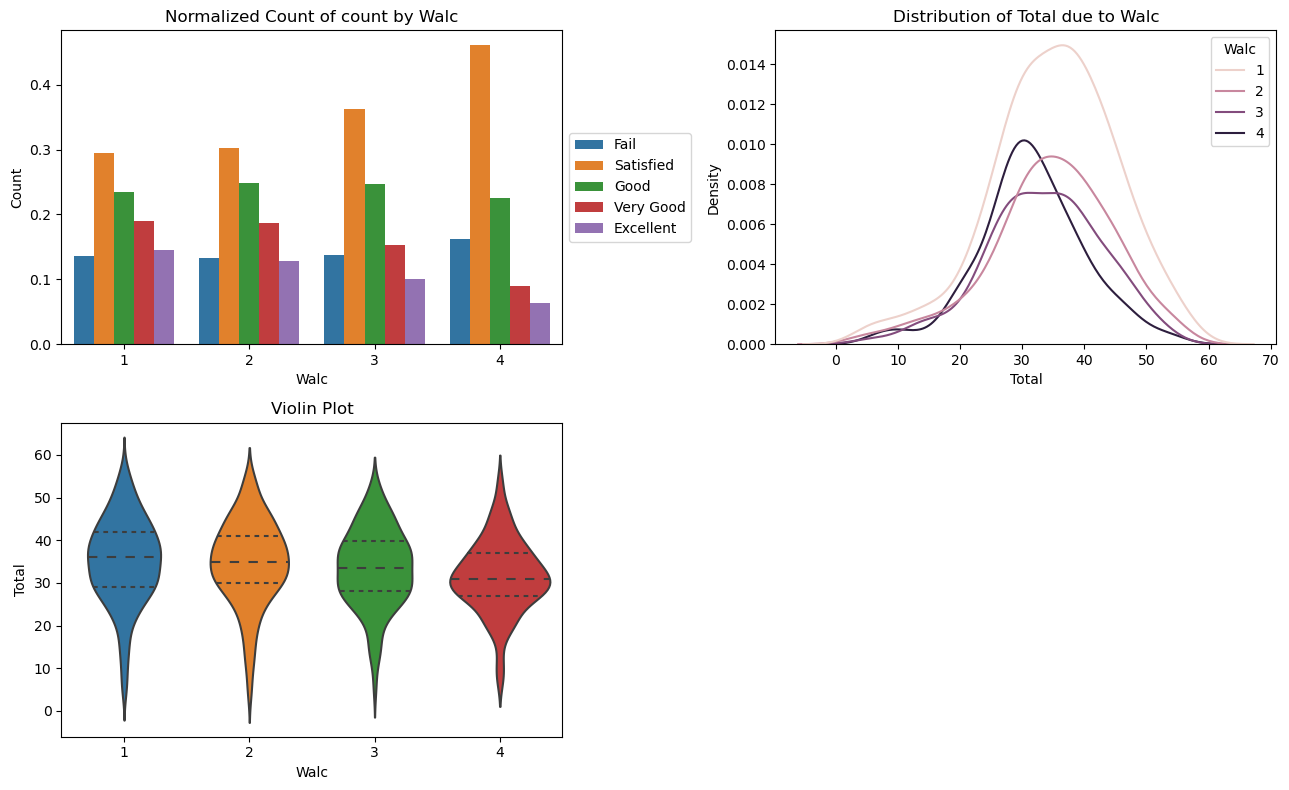

In [47]:
EDA_data(data, 'Walc', 'count', 'Grades', 'Total', 'Walc', 'Walc', 'Total')

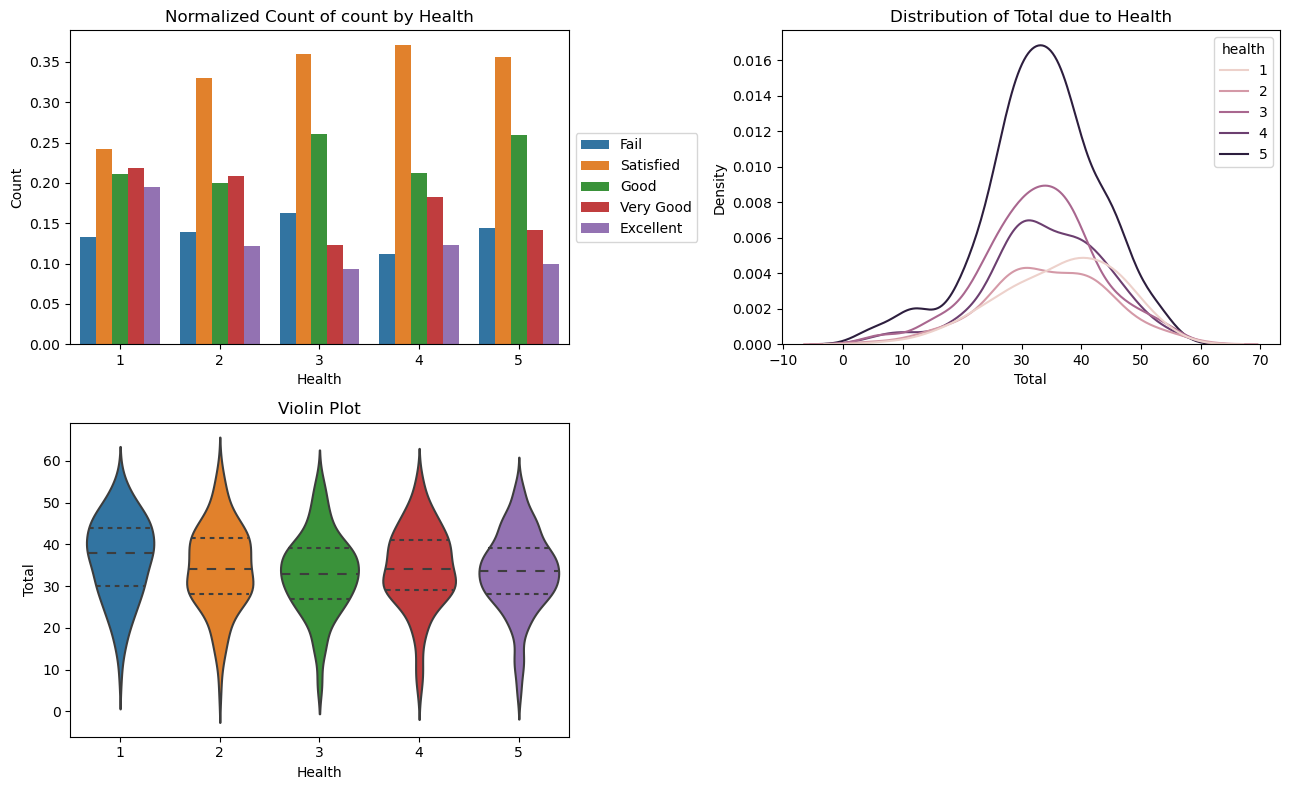

In [48]:
#EDA for health
EDA_data(data, 'health', 'count', 'Grades', 'Total', 'health', 'health', 'Total')

In [49]:
#EDA for absences
data['absences'].value_counts()

absences
0     359
2     175
4     146
6      80
8      64
10     38
12     24
14     20
5      17
1      15
3      15
9      10
7      10
11      8
15      5
13      4
Name: count, dtype: int64

We will combine this into just 2 tendency: absence or not absence.

In [50]:
condition= [
    (data['absences'] == 0),
    (data['absences'] > 0)
]

values = [0, 1]

data['absences'] = np.select(condition, values, default='')

In [51]:
data['absences'].value_counts()

absences
1    631
0    359
Name: count, dtype: int64

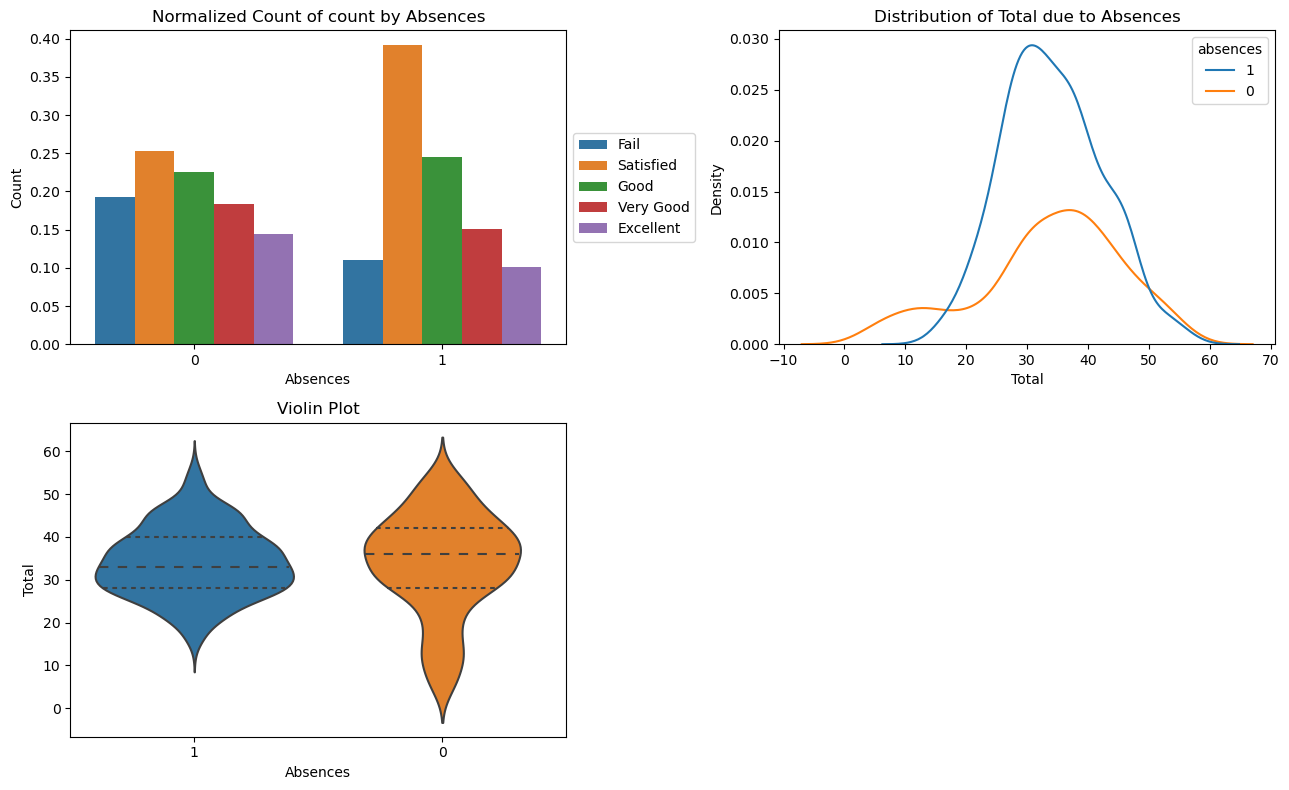

In [52]:
EDA_data(data, 'absences', 'count', 'Grades', 'Total', 'absences', 'absences', 'Total')

In [53]:
#EDA for traveltime
data['traveltime'].value_counts()

traveltime
1    590
2    302
3     74
4     24
Name: count, dtype: int64

We will combine this into just 2 tendency: travel less than 15mins or more than 15mins

In [54]:
condition = [
    (data['traveltime'] == 1),
    (data['traveltime'] > 1)
]

values = [0, 1]

data['traveltime'] = np.select(condition, values, default='')

In [55]:
data['traveltime'].value_counts()

traveltime
0    590
1    400
Name: count, dtype: int64

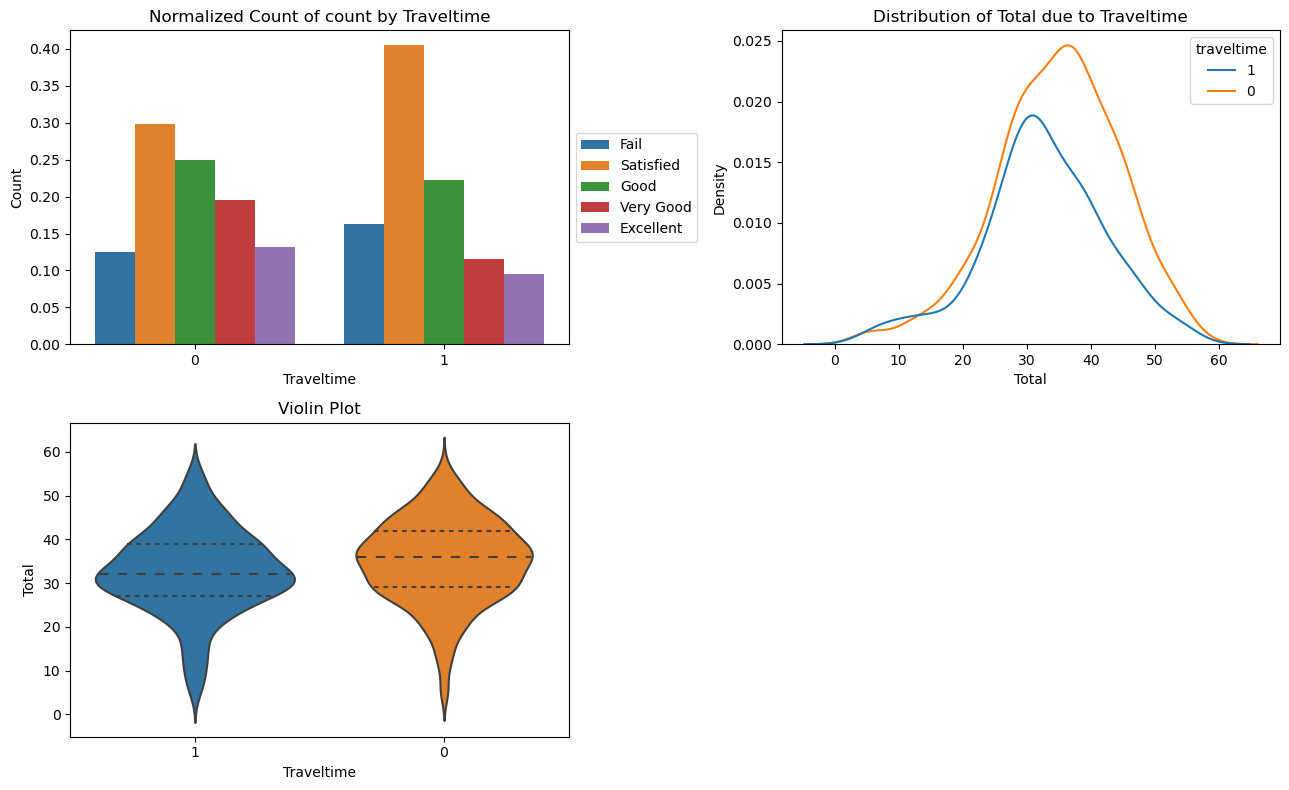

In [56]:
EDA_data(data, 'traveltime', 'count', 'Grades', 'Total', 'traveltime', 'traveltime', 'Total')

In [57]:
#EDA for studytime
data['studytime'].value_counts()

studytime
2    473
1    296
3    159
4     62
Name: count, dtype: int64

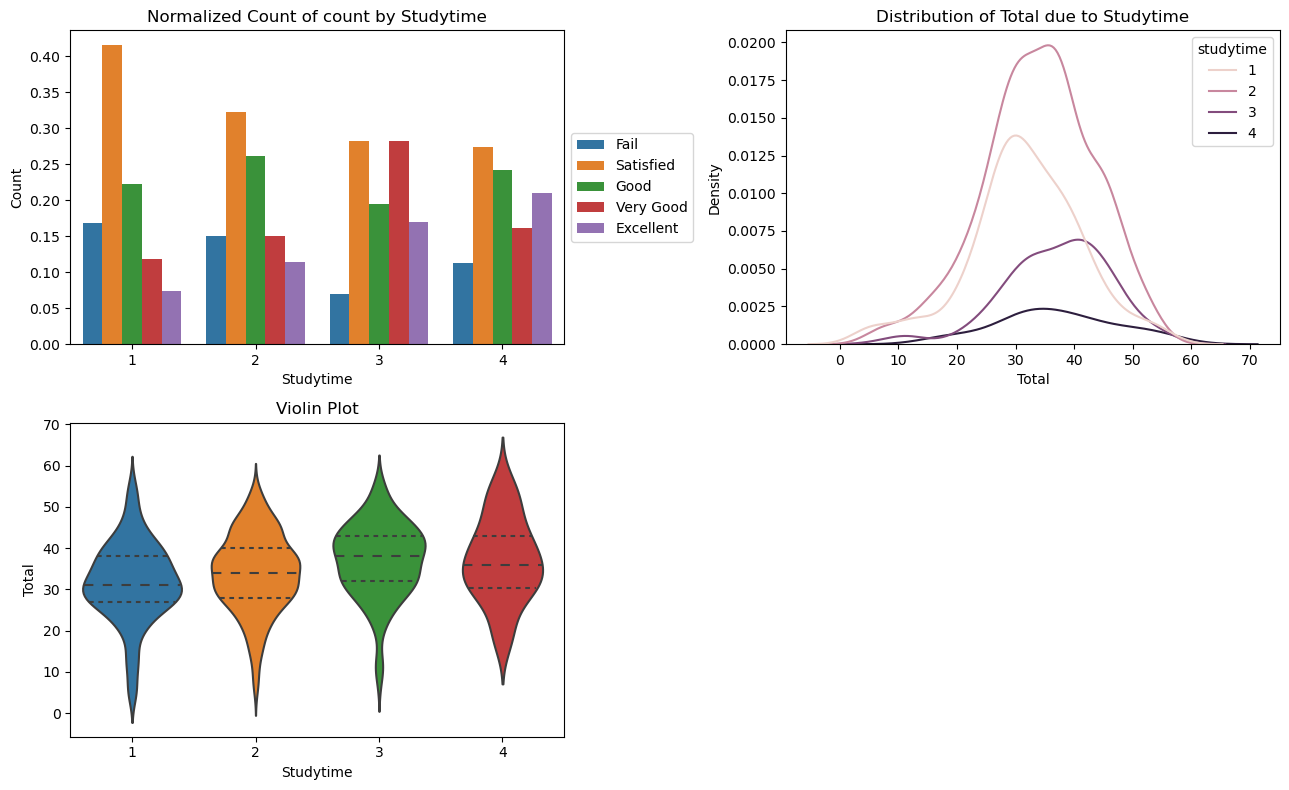

In [58]:
EDA_data(data, 'studytime', 'count', 'Grades', 'Total', 'studytime', 'studytime', 'Total')

In [59]:
#EDA for failures
data['failures'].value_counts()

failures
0    828
1    103
2     31
3     28
Name: count, dtype: int64

We will combine this into just 2 tendency: fail or not fail anytime

In [60]:
condition = [
    (data['failures'] == 0),
    (data['failures'] > 0)
]

values = [0, 1]

data['failures'] = np.select(condition, values, default='')
data['failures'].value_counts()

failures
0    828
1    162
Name: count, dtype: int64

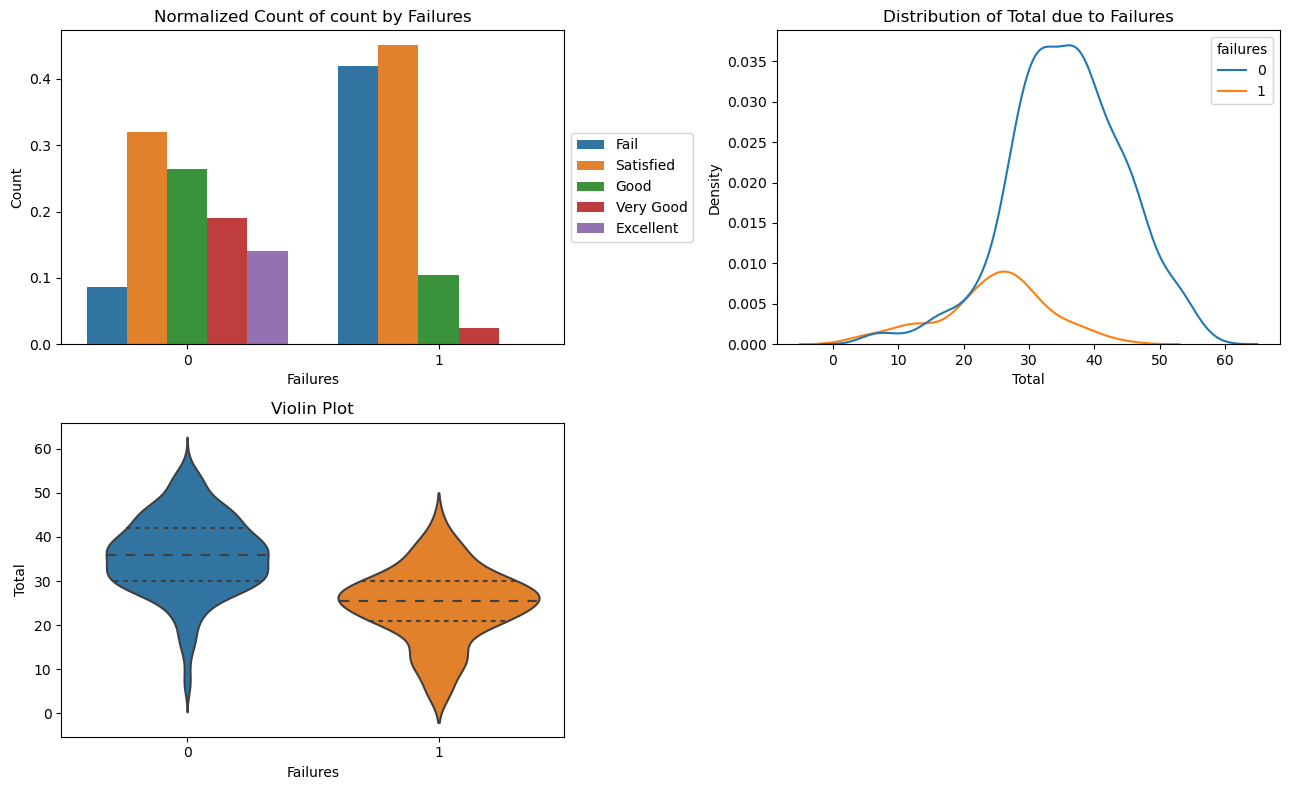

In [61]:
EDA_data(data, 'failures', 'count', 'Grades', 'Total', 'failures', 'failures', 'Total')

In [62]:
#EDA for age
data['age'].value_counts()

age
16    269
17    256
18    214
15    191
19     48
20      9
21      2
22      1
Name: count, dtype: int64

We will combine this into 5 groups: 15, 16, 17, 18, over 18

In [63]:
condition = [
    (data['age'] == 15),
    (data['age'] == 16),
    (data['age'] == 17),
    (data['age'] == 18),
    (data['age'] > 18)
]

values = ['15', '16', '17', '18', 'over_18']

data['age'] = np.select(condition, values, default='')
data['age'].value_counts()

age
16         269
17         256
18         214
15         191
over_18     60
Name: count, dtype: int64

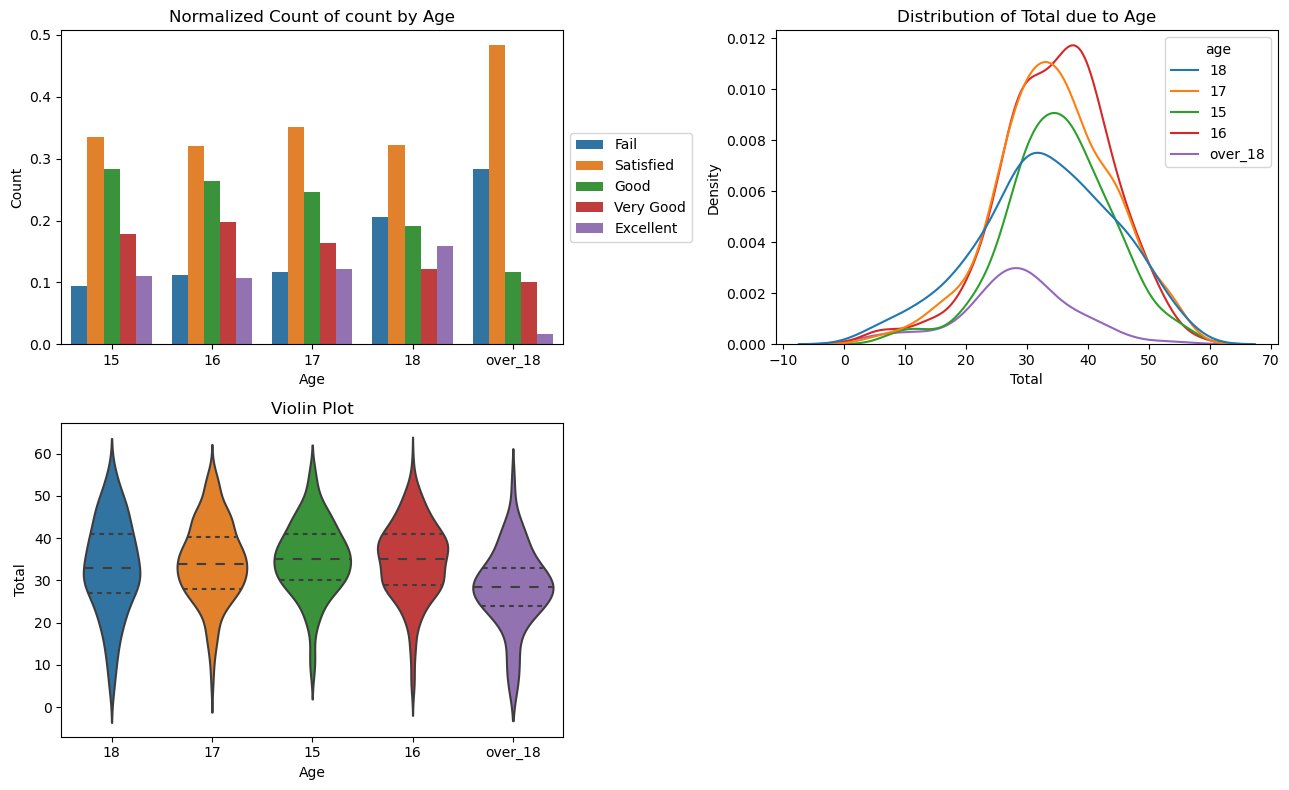

In [64]:
EDA_data(data, 'age', 'count', 'Grades', 'Total', 'age', 'age', 'Total')

# Export data into a CSV file for machine learning use

In [65]:
data.to_csv('student_clean.csv', index=False)

# Comprehensive Insights on Variables Influencing Total
Based on the exploratory data analysis conducted, we've gathered significant insights into how various factors might influence students' performance (Total). These factors have been categorized for a structured overview:

### Demographic Factors:
- **Gender (sex):** The analysis showed no significant difference in performance between males and females, suggesting that gender does not have a strong influence on grades.
- **Age:** There was a noticeable trend where older students tended to have slightly lower grades. This could be attributed to increased responsibilities or a shift in focus towards post-secondary plans among older students.

### School-Related Factors:
- **School (school):** The minor variations observed in grades between schools hint at differences in teaching quality or resources available to students (we can see that GP is slightly better).
- **Address (address):** Students residing in urban areas displayed slightly higher grades, potentially due to better access to educational resources compared to their rural counterparts.
- **Family Size (famsize):** The analysis did not reveal a clear impact of family size on grades, indicating that it might not be a decisive factor in academic performance.
- **Parent's Cohabitation Status (Pstatus):** Similar to family size, the living arrangements of parents did not show a strong correlation with grades.

### Educational Support Factors:
- **Parental Education (Medu, Fedu):** A higher educational level of parents was associated with better student performance, highlighting the importance of parental guidance and expectations.
- **School Support (schoolsup), Family Support (famsup):** While supportive environments are crucial, they did not show a strong direct correlation with grades. This suggests the complexity of educational support systems.

### Personal Factors:
- **Study Time (studytime):** A positive correlation was observed with grades, emphasizing the importance of dedicated study habits.
- **Failures (failures):** A strong inverse relationship with Total was noted, indicating that past academic challenges can significantly impact current performance.
- **Educational Aspirations (higher):** Students aiming for higher education tended to perform better, reflecting the critical role of motivation and goal orientation.

### Lifestyle Factors:
- **Free Time (freetime), Go Out (goout):** These factors had a nuanced impact on grades; both excessive socializing and very limited leisure time could negatively affect academic performance.
- **Health (health):** Better health was slightly correlated with better grades, possibly due to reduced absenteeism and higher concentration levels.

### Consumption Habits:
- **Alcohol Consumption (Dalc, Walc):** Higher consumption levels were mildly associated with lower grades, suggesting potential adverse effects on academic focus and performance.

### Other Observations:
- **Absences (absences):** While a moderate number of absences did not significantly impact grades, excessive absenteeism was negatively correlated with performance.

### Conclusion:
This analysis underscores the multifaceted influences on academic performance. Notably, study habits, past academic failures, students' educational aspirations, and parental education emerge as significant predictors of the performance (Total). Other factors, such as health, leisure activities, and aspirations, also play roles but are part of a broader, more complex set of factors affecting student outcomes. In conclusion, we will use features: 'age', 'school', 'address', 'Medu', 'Fedu', 'studytime', 'failures', 'higher', 'freetime', 'goout', 'health', 'Dalc', 'Walc', 'absences' to predict the student's performance.